In [1]:
import os
os.chdir('D:\\Desktop\\Bureau à trier\\Documents\\Periode_off_2019\\Pole_emploi\\Openclassrooms_formation\\Projets\\Projet7\\Data')

# Import needed libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
print(len(os.listdir(".")))
print(os.listdir("."))

20
['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'data_dashboard.csv', 'data_dashboard_orig.csv', 'data_dashboard_orig_proba.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'predictions_clients.npz', 'previous_application.csv', 'random_forest_shap.pkl', 'sample_submission.csv', 'shap_values_0.npz', 'shap_values_1.npz', 'shap_values_orig_0.npz', 'shap_values_orig_1.npz', 'X_test_orig_scaled.npz']


In [4]:
# Load Data from CSV files
app_train_df = pd.read_csv("application_train.csv")
# app_test_df = pd.read_csv("application_test.csv")
bur_df = pd.read_csv("bureau.csv")
bur_balance_df = pd.read_csv("bureau_balance.csv")
cc_balance_df = pd.read_csv("credit_card_balance.csv")
desc_df = pd.read_csv("HomeCredit_columns_description.csv", encoding='latin1')
payments_df = pd.read_csv("installments_payments.csv")
pc_balance_df = pd.read_csv("POS_CASH_balance.csv")
prev_app_df = pd.read_csv("previous_application.csv")
# subm_df = pd.read_csv("sample_submission.csv")

# Check Data

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_list = [app_train_df, bur_df, bur_balance_df, cc_balance_df, desc_df,
           payments_df, pc_balance_df, prev_app_df]

for df in df_list:
    # Take a look at the dataframes
    print("Shape of dataframe is:")
    print(df.shape)
    display(df.head())
    # Check NA values
    print("NA rate:")
    print((df.isnull().mean() * 100)) # round
    print("\n")
    # Check types of columns
    print("Number of different types in dataframe:")
    print(df.dtypes.value_counts())
    print("\n")
    # Check duplicates
    print('Whole row duplicates: {}'.format(df.duplicated().sum()))
    print("\n")

Shape of dataframe is:
(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

NA rate:
SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE           

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

NA rate:
SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473490
dtype: float64


Number of different types in dataframe:
float64    8
int64      6
object     3
dtype: int64


Whole row duplicates: 0


Shape of dataframe is:
(27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

NA rate:
SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64


Number of different types in dataframe:
int64     2
object    1
dtype: int64


Whole row duplicates: 0


Shape of dataframe is:
(3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

NA rate:
SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
MONTHS_BALANCE                 0.000000
AMT_BALANCE                    0.000000
AMT_CREDIT_LIMIT_ACTUAL        0.000000
AMT_DRAWINGS_ATM_CURRENT      19.524872
AMT_DRAWINGS_CURRENT           0.000000
AMT_DRAWINGS_OTHER_CURRENT    19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
AMT_INST_MIN_REGULARITY        7.948208
AMT_PAYMENT_CURRENT           19.998063
AMT_PAYMENT_TOTAL_CURRENT      0.000000
AMT_RECEIVABLE_PRINCIPAL       0.000000
AMT_RECIVABLE                  0.000000
AMT_TOTAL_RECEIVABLE           0.000000
CNT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_CURRENT           0.000000
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_POS_CURRENT      19.524872
CNT_INSTALMENT_MATURE_CUM      7.948208
NAME_CONTRACT_STATUS           0.000000
SK_DPD                         0.000000
SK_DPD_DEF                     0.000000
dtype: float64


Number of different types in dataframe:
float64    15


Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

NA rate:
Unnamed: 0      0.000000
Table           0.000000
Row             0.000000
Description     0.000000
Special        60.730594
dtype: float64


Number of different types in dataframe:
object    4
int64     1
dtype: int64


Whole row duplicates: 0


Shape of dataframe is:
(13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

NA rate:
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.021352
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.021352
dtype: float64


Number of different types in dataframe:
float64    5
int64      3
dtype: int64


Whole row duplicates: 0


Shape of dataframe is:
(10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

NA rate:
SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.260675
CNT_INSTALMENT_FUTURE    0.260835
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64


Number of different types in dataframe:
int64      5
float64    2
object     1
dtype: int64


Whole row duplicates: 0


Shape of dataframe is:
(1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

NA rate:
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PR

In [6]:
# Check duplicates with SK_ID_CURR in dataset
print('app_train_df id duplicates: {}'.format(app_train_df.duplicated(subset=['SK_ID_CURR']).sum()))
# print('app_test_df id duplicates: {}'.format(app_test_df.duplicated(subset=['SK_ID_CURR']).sum()))
# print('prev_app_df id duplicates: {}'.format(prev_app_df.duplicated(subset=['SK_ID_PREV']).sum()))

app_train_df id duplicates: 0


In [7]:
pd.set_option('display.max_colwidth', None)
# Display TARGET description
print(desc_df[(desc_df['Table']=='application_{train|test}.csv')&(desc_df['Row']=='TARGET')]['Description'])

1    Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
Name: Description, dtype: object


# Exploratory Data Analysis (EDA) 

Target value counts: 
0    0.92
1    0.08
Name: TARGET, dtype: float64


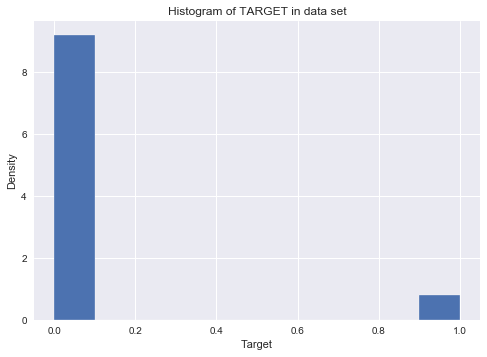

In [8]:
%matplotlib inline
sns.set()

plt.style.use('seaborn')
# Set appropriate colors map for color blindness 
plt.set_cmap('coolwarm')
ax = plt.axes()

# Explore train data

# Check distribution of target in train data
# Target simplified:
# 0: the loan was repaid / 1: the loan was not repaid
print("Target value counts: ")
print(app_train_df['TARGET'].value_counts(normalize=True).round(2))
plt.title("Histogram of TARGET in data set")
plt.xlabel("Target")
plt.ylabel("Density")
app_train_df['TARGET'].hist(density=True)
plt.show()

In [9]:
# Number of unique classes in each object column
app_train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [10]:
# Create label encoder
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train_df:
    if app_train_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train_df[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train_df[col])
            # Transform both training and testing data
            app_train_df[col] = le.transform(app_train_df[col])
#             app_test_df[col] = le.transform(app_test_df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [11]:
# One hot encoding for the rest of categorical variables
app_train_df = pd.get_dummies(app_train_df)
# app_test_df = pd.get_dummies(app_test_df)

print('Features shape: ', app_train_df.shape)
# print('Testing Features shape: ', app_test_df.shape)

Features shape:  (307511, 243)


In [12]:
# Check differences in columns between the train and test dataframes
# app_train_df.columns.difference(app_test_df.columns)

In [13]:
# Aligning Training and Testing Data

# Get training labels
# train_labels = app_train_df['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
# app_train_df, app_test_df = app_train_df.align(app_test_df, join = 'inner', axis = 1)

# Add the target back in train df
# app_train_df['TARGET'] = train_labels

# print('Features shape: ', app_train_df.shape)
# print('Testing Features shape: ', app_test_df.shape)


In [14]:
# Get description of DAYS_BIRTH
print(desc_df[(desc_df['Table']=='application_{train|test}.csv')&(desc_df['Row']=='DAYS_BIRTH')]['Description'])

17    Client's age in days at the time of application
Name: Description, dtype: object


In [15]:
# Detect anomalies/outliers
# Train set
print("Min DAYS_BIRTH: ", app_train_df['DAYS_BIRTH'].min())
print("Max DAYS_BIRTH: ",app_train_df['DAYS_BIRTH'].max())

# Describe DAYS_BIRTH
(app_train_df['DAYS_BIRTH'] / -365).describe()

Min DAYS_BIRTH:  -25229
Max DAYS_BIRTH:  -7489


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [16]:
# Test set
# print("Min DAYS_BIRTH: ", app_test_df['DAYS_BIRTH'].min())
# print("Max DAYS_BIRTH: ",app_test_df['DAYS_BIRTH'].max())

# # Describe DAYS_BIRTH
# (app_test_df['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


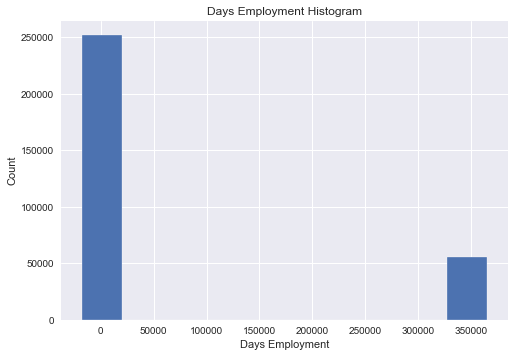

In [17]:
# Train set
print(app_train_df['DAYS_EMPLOYED'].describe())

plt.title('Days Employment Histogram')
plt.xlabel('Days Employment')
plt.ylabel("Count")
app_train_df['DAYS_EMPLOYED'].hist()
plt.show()

In [18]:
# Test set
# print(app_test_df['DAYS_EMPLOYED'].describe())

# plt.title('Days Employment Histogram (test set)')
# plt.xlabel('Days Employment')
# plt.ylabel("Count")
# app_test_df['DAYS_EMPLOYED'].hist()

In [19]:
anom = app_train_df[app_train_df['DAYS_EMPLOYED'] == 365243]
non_anom = app_train_df[app_train_df['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


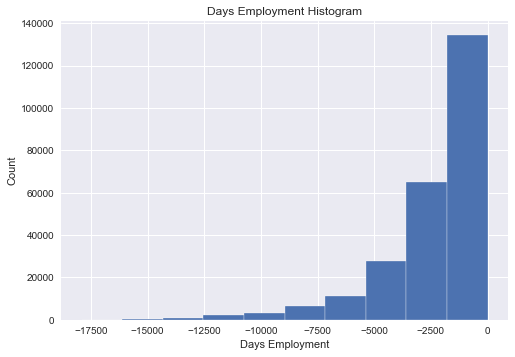

In [20]:
# Create an anomalous flag column
app_train_df['DAYS_EMPLOYED_ANOM'] = app_train_df["DAYS_EMPLOYED"] == 365243 # app_train_df['DAYS_EMPLOYED'].max()

# Replace the anomalous values with nan
app_train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plt.title("Days Employment Histogram")
plt.xlabel('Days Employment')
plt.ylabel("Count")
app_train_df['DAYS_EMPLOYED'].hist()


In [21]:
# Do the same for test data
# app_test_df['DAYS_EMPLOYED_ANOM'] = app_test_df["DAYS_EMPLOYED"] == 365243
# app_test_df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# print('There are %d anomalies in the test data out of %d entries' % (app_test_df["DAYS_EMPLOYED_ANOM"].sum(), len(app_test_df)))

In [22]:
# Check other potential interesting columns (with DAYS)
print(app_train_df['DAYS_REGISTRATION'].describe())
print(app_train_df['DAYS_ID_PUBLISH'].describe())

# print(app_test_df['DAYS_REGISTRATION'].describe())
# print(app_test_df['DAYS_ID_PUBLISH'].describe())

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


In [23]:
# Find correlations with the target and sort
correlations = app_train_df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [24]:
# Check Bureau data
print(desc_df[(desc_df['Table']=='bureau.csv')][['Row', 'Description']], "\n")
print(bur_df.dtypes.value_counts(), "\n")
print(bur_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0), "\n")
print(bur_df['CREDIT_ACTIVE'].unique(), "\n")
print(bur_df['CREDIT_TYPE'].unique(), "\n")

                        Row  \
122              SK_ID_CURR   
123            SK_BUREAU_ID   
124           CREDIT_ACTIVE   
125         CREDIT_CURRENCY   
126             DAYS_CREDIT   
127      CREDIT_DAY_OVERDUE   
128     DAYS_CREDIT_ENDDATE   
129       DAYS_ENDDATE_FACT   
130  AMT_CREDIT_MAX_OVERDUE   
131      CNT_CREDIT_PROLONG   
132          AMT_CREDIT_SUM   
133     AMT_CREDIT_SUM_DEBT   
134    AMT_CREDIT_SUM_LIMIT   
135  AMT_CREDIT_SUM_OVERDUE   
136             CREDIT_TYPE   
137      DAYS_CREDIT_UPDATE   
138             AMT_ANNUITY   

                                                                                                             Description  
122  ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau   
123            Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)  
124                                                                    S

In [25]:
# Find the correlation of the positive days since birth and target
# app_train_df['DAYS_BIRTH'] = abs(app_train_df['DAYS_BIRTH'])
# app_test_df['DAYS_BIRTH'] = abs(app_test_df['DAYS_BIRTH'])
-app_train_df['DAYS_BIRTH'].corr(app_train_df['TARGET'])

-0.07823930830982712

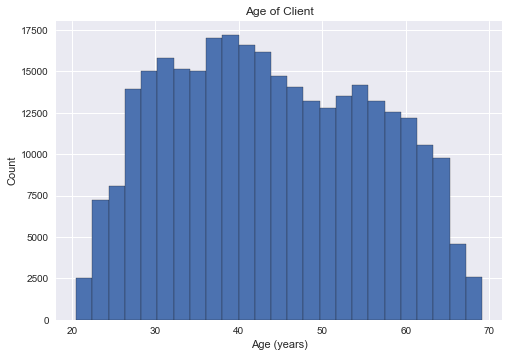

In [26]:
# Plot the distribution of ages in years
plt.hist(-app_train_df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');


TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1       -9461    25.920548  (25.0, 30.0]
1       0      -16765    45.931507  (45.0, 50.0]
2       0      -19046    52.180822  (50.0, 55.0]
3       0      -19005    52.068493  (50.0, 55.0]
4       0      -19932    54.608219  (50.0, 55.0]
5       0      -16941    46.413699  (45.0, 50.0]
6       0      -13778    37.747945  (35.0, 40.0]
7       0      -18850    51.643836  (50.0, 55.0]
8       0      -20099    55.065753  (55.0, 60.0]
9       0      -14469    39.641096  (35.0, 40.0]

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036  -8532.795625    23.377522
(25.0, 30.0]  0.111436 -10155.219250    27.822518
(30.0, 35.0]  0.102814 -11854.848377    32.479037
(35.0, 40.0]  0.089414 -13707.908253    37.555913
(40.0, 45.0]  0.078491 -15497.661233    42.459346
(45.0, 50.0]  0.074171 -17323.900441    47.462741
(50.0, 55.0]  0.066968 -19196.494791    52.593136
(55.0, 60.0]  0.055314 -20984.262742    57.491131
(60.0, 65.0]  0.052737 -22780.547460    62.412459
(65.0, 70.0]  0.037270 -24292.614340    66.555108

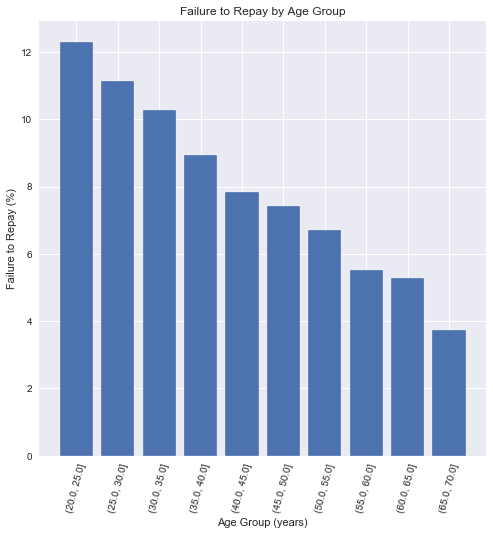

In [27]:
# Age information into a separate dataframe
age_data = app_train_df[['TARGET', 'DAYS_BIRTH']]
age_data_years = age_data.copy()
age_data_years['YEARS_BIRTH'] = -age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data_years['YEARS_BINNED'] = pd.cut(age_data_years['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
display(age_data_years.head(10))

# Group by the bin and calculate averages
age_groups  = age_data_years.groupby('YEARS_BINNED').mean()
display(age_groups)

plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [28]:
# Negative correlations with target were:
# EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3
# Let's look at their descriptions
print("EXT_SOURCE_1: ")
print(desc_df[(desc_df['Table']=='application_{train|test}.csv')&(desc_df['Row']=='EXT_SOURCE_1')]['Description'])
print("EXT_SOURCE_2: ")
print(desc_df[(desc_df['Table']=='application_{train|test}.csv')&(desc_df['Row']=='EXT_SOURCE_2')]['Description'])
print("EXT_SOURCE_3: ")
print(desc_df[(desc_df['Table']=='application_{train|test}.csv')&(desc_df['Row']=='EXT_SOURCE_3')]['Description'])

EXT_SOURCE_1: 
41    Normalized score from external data source
Name: Description, dtype: object
EXT_SOURCE_2: 
42    Normalized score from external data source
Name: Description, dtype: object
EXT_SOURCE_3: 
43    Normalized score from external data source
Name: Description, dtype: object


TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919    0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846   -0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167   -0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000   -0.205478
DAYS_BIRTH    0.078239     -0.600610     -0.091996     -0.205478    1.000000

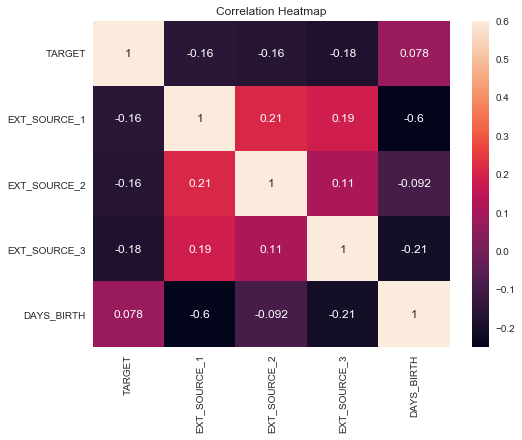

In [29]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train_df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
display(ext_data_corrs)

plt.figure(figsize = (8, 6))
# Heatmap of correlations
sns.heatmap(ext_data_corrs, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

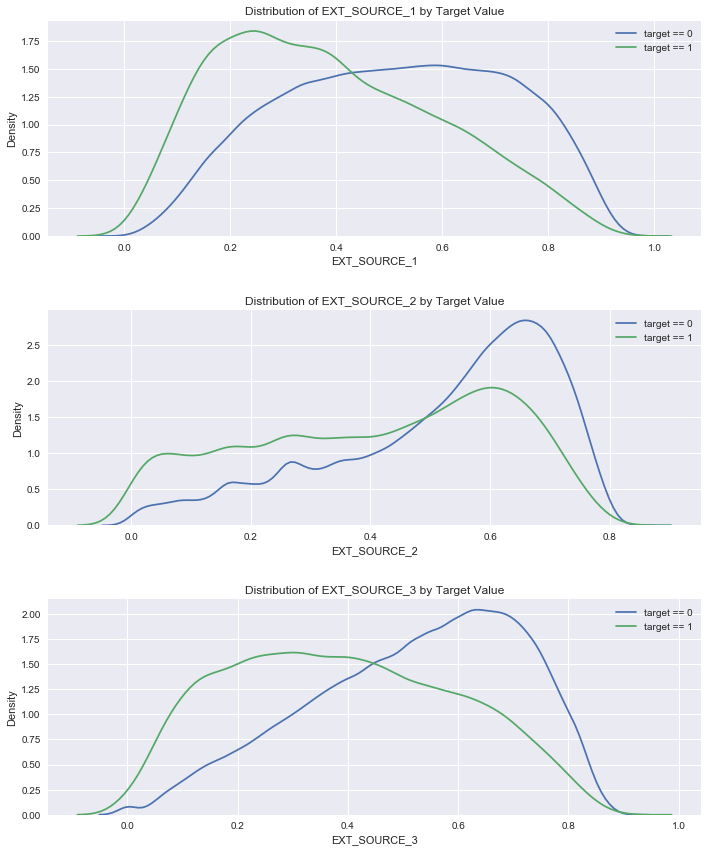

In [30]:
# KDE plot

# A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram
# (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels
# to develop a single smooth curve)


plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_df.loc[app_train_df['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_df.loc[app_train_df['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

# Analysis and merge with other tables

In [31]:
print(bur_df.shape)
display(bur_df.head())
print('bur_df id duplicates: {}'.format(bur_df.duplicated(subset=['SK_ID_BUREAU']).sum()))

(1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bur_df id duplicates: 0


In [32]:
print(bur_df['CREDIT_ACTIVE'].nunique())
print(bur_df['CREDIT_ACTIVE'].unique())
print(bur_df['CREDIT_CURRENCY'].nunique())
print(bur_df['CREDIT_CURRENCY'].unique())
print(bur_df['CREDIT_TYPE'].nunique())
print(bur_df['CREDIT_TYPE'].unique())

4
['Closed' 'Active' 'Sold' 'Bad debt']
4
['currency 1' 'currency 2' 'currency 4' 'currency 3']
15
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']


In [33]:
bur_df = pd.get_dummies(bur_df)
print(bur_df.shape)
bur_df.head()

(1716428, 37)


SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      215354       5714462         -497                   0   
1      215354       5714463         -208                   0   
2      215354       5714464         -203                   0   
3      215354       5714465         -203                   0   
4      215354       5714466         -629                   0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0               -153.0             -153.0                     NaN   
1               1075.0                NaN                     NaN   
2                528.0                NaN                     NaN   
3                  NaN                NaN                     NaN   
4               1197.0                NaN                 77674.5   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         91323.0                  0.0   
1                   0        225000.0             171342.0   
2                   0        464323.5                  NaN   
3                   0         90000.0                  NaN   
4                   0       2700000.0                  NaN   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
0                   NaN                     0.0                -131   
1                   NaN                     0.0                 -20   
2                   NaN                     0.0                 -16   
3                   NaN                     0.0                 -16   
4                   NaN                     0.0                 -21   

   AMT_ANNUITY  CREDIT_ACTIVE_Active  CREDIT_ACTIVE_Bad debt  \
0          NaN                     0                       0   
1          NaN                     1                       0   
2          NaN                     1                       0   
3          NaN                     1                       0   
4          NaN                     1                       0   

   CREDIT_ACTIVE_Closed  CREDIT_ACTIVE_Sold  CREDIT_CURRENCY_currency 1  \
0                     1                   0                           1   
1                     0                   0                           1   
2                     0                   0                           1   
3                     0                   0                           1   
4                     0                   0                           1   

   CREDIT_CURRENCY_currency 2  CREDIT_CURRENCY_currency 3  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   CREDIT_CURRENCY_currency 4  CREDIT_TYPE_Another type of loan  \
0                           0                                 0   
1                           0                                 0   
2                           0                                 0   
3                           0                                 0   
4                           0                                 0   

   CREDIT_TYPE_Car loan  CREDIT_TYPE_Cash loan (non-earmarked)  \
0                     0                                      0   
1                     0                                      0   
2                     0                                      0   
3                     0                                      0   
4                     0                                      0   

   CREDIT_TYPE_Consumer credit  CREDIT_TYPE_Credit card  \
0                            1                        0   
1                            0                        1   
2                            1                        0   
3                            0                        1   
4                            1                        0   

   CREDIT_TYPE_Interbank credit  CREDIT_TYPE_

In [34]:
print(desc_df[(desc_df['Table']=='bureau.csv')&(desc_df['Row']=='CREDIT_DAY_OVERDUE')]['Description'])
print(desc_df[(desc_df['Table']=='bureau.csv')&(desc_df['Row']=='AMT_CREDIT_SUM')]['Description'])

127    Number of days past due on CB credit at the time of application for related loan in our sample
Name: Description, dtype: object
132    Current credit amount for the Credit Bureau credit
Name: Description, dtype: object


In [35]:
bur_agg = bur_df.groupby('SK_ID_CURR').agg({'SK_ID_BUREAU': 'count', 'CREDIT_DAY_OVERDUE': 'mean',
                                           'AMT_CREDIT_SUM': 'sum', 'CREDIT_ACTIVE_Active': 'sum',
                                           'CREDIT_ACTIVE_Bad debt': 'sum', 'CREDIT_ACTIVE_Closed': 'sum',
                                           'CREDIT_ACTIVE_Sold': 'sum'})
bur_agg = bur_agg.reset_index()
print(bur_agg.shape)
bur_agg.head()

(305811, 8)


SK_ID_CURR  SK_ID_BUREAU  CREDIT_DAY_OVERDUE  AMT_CREDIT_SUM  \
0      100001             7                 0.0     1453365.000   
1      100002             8                 0.0      865055.565   
2      100003             4                 0.0     1017400.500   
3      100004             2                 0.0      189037.800   
4      100005             3                 0.0      657126.000   

   CREDIT_ACTIVE_Active  CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  \
0                     3                       0                     4   
1                     2                       0                     6   
2                     1                       0                     3   
3                     0                       0                     2   
4                     2                       0                     1   

   CREDIT_ACTIVE_Sold  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [36]:
print(bur_balance_df.shape)
display(bur_balance_df.head())

(27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [37]:
print(desc_df[(desc_df['Table']=='bureau_balance.csv')&(desc_df['Row']=='MONTHS_BALANCE')]['Description'])
print(desc_df[(desc_df['Table']=='bureau_balance.csv')&(desc_df['Row']=='STATUS')]['Description'])

140    Month of balance relative to application date (-1 means the freshest balance date)
Name: Description, dtype: object
141    Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 means DPD 120+ or sold or written off ] )
Name: Description, dtype: object


In [38]:
print(bur_balance_df['STATUS'].nunique())
print(bur_balance_df['STATUS'].unique())

8
['C' '0' 'X' '1' '2' '3' '5' '4']


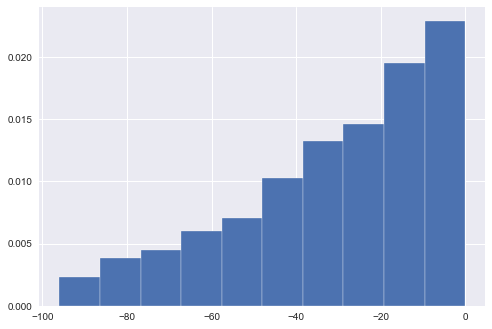

In [39]:
# ADD title and axes labels
bur_balance_df['MONTHS_BALANCE'].hist(density=True)
plt.show()

In [40]:
bur_bal_agg = bur_balance_df.groupby('SK_ID_BUREAU').agg({'MONTHS_BALANCE': 'mean'})
bur_bal_agg = bur_bal_agg.reset_index()
bur_bal_agg.head()

SK_ID_BUREAU  MONTHS_BALANCE
0       5001709           -48.0
1       5001710           -41.0
2       5001711            -1.5
3       5001712            -9.0
4       5001713           -10.5

In [41]:
print(cc_balance_df.shape)
display(cc_balance_df.head())
print('cc_balance_df curr id duplicates: {}'.format(cc_balance_df.duplicated(subset=['SK_ID_CURR']).sum()))
print('cc_balance_df prev id duplicates: {}'.format(cc_balance_df.duplicated(subset=['SK_ID_PREV']).sum()))


(3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

cc_balance_df curr id duplicates: 3736754
cc_balance_df prev id duplicates: 3736005


In [42]:
print(cc_balance_df['NAME_CONTRACT_STATUS'].nunique())
print(cc_balance_df['NAME_CONTRACT_STATUS'].unique())

7
['Active' 'Completed' 'Demand' 'Signed' 'Sent proposal' 'Refused'
 'Approved']


In [43]:
cc_balance_df = pd.get_dummies(cc_balance_df)
cc_balance_df.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  SK_DPD  SK_DPD_DEF  \
0                       1.0                       35.0       0           0   
1                       0.0                       69.0       0           0   
2                       0.0                       30.0       0           0   
3                       0.0                       10.0       0           0   
4                       1.0                      101.0       0           0   

   NAME_CONTRACT_STATUS_Active  NAME_CONTRACT_STATUS_Approved  \
0                            1                              0   
1                            1                              0   
2                            1                              0   
3                            1                              0   
4                            1                              0   

   NAME_CONTRACT_STATUS_Completed  NAME_CONTRACT_STATUS_Demand  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   NAME_CONTRACT_STATUS_Refused  NAME_CONTRACT_STATUS_Sent proposal  \
0                             0                                   0   
1                             0                                   

In [44]:
print(desc_df[(desc_df['Table']=='credit_card_balance.csv')&(desc_df['Row']=='MONTHS_BALANCE')]['Description'])
print(desc_df[(desc_df['Table']=='credit_card_balance.csv')&(desc_df['Row']=='AMT_CREDIT_LIMIT_ACTUAL')]['Description'])
print(desc_df[(desc_df['Table']=='credit_card_balance.csv')&(desc_df['Row']=='AMT_PAYMENT_TOTAL_CURRENT')]['Description'])

152    Month of balance relative to application date (-1 means the freshest balance date)
Name: Description, dtype: object
154    Credit card limit during the month of the previous credit
Name: Description, dtype: object
161    How much did the client pay during the month in total on the previous credit
Name: Description, dtype: object


In [45]:

cc_balance_agg = cc_balance_df.groupby('SK_ID_CURR').agg({'SK_ID_PREV': 'count', 'MONTHS_BALANCE': 'mean',
                                           'AMT_CREDIT_LIMIT_ACTUAL': 'mean', 'AMT_PAYMENT_TOTAL_CURRENT': 'sum',
                                            'NAME_CONTRACT_STATUS_Active': 'sum', 'NAME_CONTRACT_STATUS_Approved': 'sum',
                                            'NAME_CONTRACT_STATUS_Completed': 'sum', 'NAME_CONTRACT_STATUS_Demand': 'sum',
                                            'NAME_CONTRACT_STATUS_Refused': 'sum', 'NAME_CONTRACT_STATUS_Sent proposal': 'sum',
                                            'NAME_CONTRACT_STATUS_Signed': 'sum'})
cc_balance_agg = cc_balance_agg.reset_index()
print(cc_balance_agg.shape)
cc_balance_agg.head()

(103558, 12)


SK_ID_CURR  SK_ID_PREV  MONTHS_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0      100006           6            -3.5            270000.000000   
1      100011          74           -38.5            164189.189189   
2      100013          96           -48.5            131718.750000   
3      100021          17           -10.0            675000.000000   
4      100023           8            -7.5            135000.000000   

   AMT_PAYMENT_TOTAL_CURRENT  NAME_CONTRACT_STATUS_Active  \
0                      0.000                            6   
1                 334485.000                           74   
2                 654448.545                           96   
3                      0.000                            7   
4                      0.000                            8   

   NAME_CONTRACT_STATUS_Approved  NAME_CONTRACT_STATUS_Completed  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                              10   
4                              0                               0   

   NAME_CONTRACT_STATUS_Demand  NAME_CONTRACT_STATUS_Refused  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   NAME_CONTRACT_STATUS_Sent proposal  NAME_CONTRACT_STATUS_Signed  
0                                   0                            0  
1                                   0                            0  
2                                   0                            0  
3                                   0                            0  
4                                   0                            0

In [46]:
print(pc_balance_df.shape)
display(pc_balance_df.head())


(10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [47]:
pc_balance_df = pd.get_dummies(pc_balance_df)
pc_balance_df.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE  SK_DPD  SK_DPD_DEF  NAME_CONTRACT_STATUS_Active  \
0                   45.0       0           0                            1   
1                   35.0       0           0                            1   
2                    9.0       0           0                            1   
3                   42.0       0           0                            1   
4                   35.0       0           0                            1   

   NAME_CONTRACT_STATUS_Amortized debt  NAME_CONTRACT_STATUS_Approved  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              0   

   NAME_CONTRACT_STATUS_Canceled  NAME_CONTRACT_STATUS_Completed  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   NAME_CONTRACT_STATUS_Demand  NAME_CONTRACT_STATUS_Returned to the store  \
0                            0                                           0   
1                            0                                           0   
2                            0                                           0   
3                            0                                           0   
4                            0                                           0   

   NAME_CONTRACT_STATUS_Signed  NAME_CONTRACT_STATUS_XNA  
0                            0                         0  
1                            0                         0  
2                            0                         0  
3                            0                         0  
4                            0                         0

In [48]:
pc_balance_agg = pc_balance_df.groupby('SK_ID_CURR').agg({'SK_ID_PREV': 'count', 'MONTHS_BALANCE': 'mean',
                                          'NAME_CONTRACT_STATUS_Amortized debt':'sum',
                                          'NAME_CONTRACT_STATUS_Canceled':'sum',
                                          'NAME_CONTRACT_STATUS_Returned to the store':'sum',
                                          'NAME_CONTRACT_STATUS_XNA':'sum',
                                          'NAME_CONTRACT_STATUS_Active': 'sum', 'NAME_CONTRACT_STATUS_Approved': 'sum',
                                          'NAME_CONTRACT_STATUS_Completed': 'sum', 'NAME_CONTRACT_STATUS_Demand': 'sum',
                                          'NAME_CONTRACT_STATUS_Signed': 'sum'})
pc_balance_agg = pc_balance_agg.reset_index()
print(pc_balance_agg.shape)
pc_balance_agg.head()

(337252, 12)


SK_ID_CURR  SK_ID_PREV  MONTHS_BALANCE  \
0      100001           9      -72.555556   
1      100002          19      -10.000000   
2      100003          28      -43.785714   
3      100004           4      -25.500000   
4      100005          11      -20.000000   

   NAME_CONTRACT_STATUS_Amortized debt  NAME_CONTRACT_STATUS_Canceled  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              0   

   NAME_CONTRACT_STATUS_Returned to the store  NAME_CONTRACT_STATUS_XNA  \
0                                           0                         0   
1                                           0                         0   
2                                           0                         0   
3                                           0                         0   
4                                           0                         0   

   NAME_CONTRACT_STATUS_Active  NAME_CONTRACT_STATUS_Approved  \
0                          7.0                              0   
1                         19.0                              0   
2                         26.0                              0   
3                          3.0                              0   
4                          9.0                              0   

   NAME_CONTRACT_STATUS_Completed  NAME_CONTRACT_STATUS_Demand  \
0                               2                            0   
1                               0                            0   
2                               2                            0   
3                               1                            0   
4                               1                            0   

   NAME_CONTRACT_STATUS_Signed  
0                            0  
1                            0  
2                            0  
3                            0  
4                            1

In [49]:
print('Duplicates: {}'.format(pc_balance_agg.duplicated(subset=['SK_ID_CURR']).sum()))

Duplicates: 0


In [50]:
print(payments_df.shape)
display(payments_df.head())
print('payments_df curr id duplicates: {}'.format(payments_df.duplicated(subset=['SK_ID_CURR']).sum()))
print('payments_df prev id duplicates: {}'.format(payments_df.duplicated(subset=['SK_ID_PREV']).sum()))

(13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

payments_df curr id duplicates: 13265814
payments_df prev id duplicates: 12607649


In [51]:
print(desc_df[(desc_df['Table']=='installments_payments.csv')]['Row'])
print(desc_df[(desc_df['Table']=='installments_payments.csv')]['Description'])


211               SK_ID_PREV 
212                SK_ID_CURR
213    NUM_INSTALMENT_VERSION
214     NUM_INSTALMENT_NUMBER
215           DAYS_INSTALMENT
216        DAYS_ENTRY_PAYMENT
217            AMT_INSTALMENT
218               AMT_PAYMENT
Name: Row, dtype: object
211                                             ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
212                                                                                                                                                                      ID of loan in our sample
213    Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
214                                                                                                                                                      

In [52]:
payments_agg = payments_df.groupby('SK_ID_CURR').agg({'SK_ID_PREV': 'count', 'AMT_INSTALMENT': 'sum',
                                          'AMT_PAYMENT': 'sum'})
payments_agg = payments_agg.reset_index()
print(payments_agg.shape)
payments_agg.head()

(339587, 4)


SK_ID_CURR  SK_ID_PREV  AMT_INSTALMENT  AMT_PAYMENT
0      100001           7       41195.925    41195.925
1      100002          19      219625.695   219625.695
2      100003          25     1618864.650  1618864.650
3      100004           3       21288.465    21288.465
4      100005           9       56161.845    56161.845

In [53]:
print(prev_app_df.shape)
display(prev_app_df.head())
print('prev_app_df curr id duplicates: {}'.format(prev_app_df.duplicated(subset=['SK_ID_CURR']).sum()))
print('prev_app_df prev id duplicates: {}'.format(prev_app_df.duplicated(subset=['SK_ID_PREV']).sum()))

(1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

prev_app_df curr id duplicates: 1331357
prev_app_df prev id duplicates: 0


In [54]:
# OHE
feat_list = ['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
            'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_YIELD_GROUP']
for feat in feat_list:
    print(feat+": ")
    print(prev_app_df[feat].nunique())
    print(prev_app_df[feat].unique())

# print(prev_app_df['NAME_CONTRACT_STATUS'].nunique())
# print(prev_app_df['NAME_CONTRACT_STATUS'].unique())

# print(prev_app_df['NAME_PAYMENT_TYPE'].nunique())
# print(prev_app_df['CODE_REJECT_REASON'].nunique())
# print(prev_app_df['NAME_CLIENT_TYPE'].nunique())
# print(prev_app_df['NAME_PORTFOLIO'].nunique())
# print(prev_app_df['NAME_PRODUCT_TYPE'].nunique())
# print(prev_app_df['CHANNEL_TYPE'].nunique())
# print(prev_app_df['NAME_YIELD_GROUP'].nunique())



NAME_CONTRACT_TYPE: 
4
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
NAME_CONTRACT_STATUS: 
4
['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE: 
4
['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
CODE_REJECT_REASON: 
9
['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']
NAME_CLIENT_TYPE: 
4
['Repeater' 'New' 'Refreshed' 'XNA']
NAME_PORTFOLIO: 
5
['POS' 'Cash' 'XNA' 'Cards' 'Cars']
NAME_PRODUCT_TYPE: 
3
['XNA' 'x-sell' 'walk-in']
CHANNEL_TYPE: 
8
['Country-wide' 'Contact center' 'Credit and cash offices' 'Stone'
 'Regional / Local' 'AP+ (Cash loan)' 'Channel of corporate sales'
 'Car dealer']
NAME_YIELD_GROUP: 
5
['middle' 'low_action' 'high' 'low_normal' 'XNA']


In [55]:
reduc_prev_app = prev_app_df[['SK_ID_CURR', 'SK_ID_PREV', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 
                             'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_YIELD_GROUP']]

print(reduc_prev_app.shape)
reduc_prev_app.head()

(1670214, 8)


SK_ID_CURR  SK_ID_PREV CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0      271877     2030495                XAP         Repeater            POS   
1      108129     2802425                XAP         Repeater           Cash   
2      122040     2523466                XAP         Repeater           Cash   
3      176158     2819243                XAP         Repeater           Cash   
4      202054     1784265                 HC         Repeater           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_YIELD_GROUP  
0               XNA             Country-wide           middle  
1            x-sell           Contact center       low_action  
2            x-sell  Credit and cash offices             high  
3            x-sell  Credit and cash offices           middle  
4           walk-in  Credit and cash offices             high

In [56]:
reduc_prev_app = pd.get_dummies(reduc_prev_app)

In [57]:
col_list = list(reduc_prev_app.columns[2:])
# Build dict
agg_dict = {'SK_ID_PREV': 'count'}
agg_dict.update((idx, 'sum') for idx in col_list)

prev_app_agg = reduc_prev_app.groupby('SK_ID_CURR').agg(agg_dict)
prev_app_agg = prev_app_agg.reset_index()
print(prev_app_agg.shape)
prev_app_agg.head()


(338857, 36)


SK_ID_CURR  SK_ID_PREV  CODE_REJECT_REASON_CLIENT  CODE_REJECT_REASON_HC  \
0      100001           1                          0                      0   
1      100002           1                          0                      0   
2      100003           3                          0                      0   
3      100004           1                          0                      0   
4      100005           2                          0                      0   

   CODE_REJECT_REASON_LIMIT  CODE_REJECT_REASON_SCO  CODE_REJECT_REASON_SCOFR  \
0                         0                       0                         0   
1                         0                       0                         0   
2                         0                       0                         0   
3                         0                       0                         0   
4                         0                       0                         0   

   CODE_REJECT_REASON_SYSTEM  CODE_REJECT_REASON_VERIF  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   CODE_REJECT_REASON_XAP  CODE_REJECT_REASON_XNA  NAME_CLIENT_TYPE_New  \
0                       1                       0                     0   
1                       1                       0                     1   
2                       3                       0                     0   
3                       1                       0                     1   
4                       2                       0                     1   

   NAME_CLIENT_TYPE_Refreshed  NAME_CLIENT_TYPE_Repeater  \
0                           1                          0   
1                           0                          0   
2                           2                          1   
3                           0                          0   
4                           0                          1   

   NAME_CLIENT_TYPE_XNA  NAME_PORTFOLIO_Cards  NAME_PORTFOLIO_Cars  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   NAME_PORTFOLIO_Cash  NAME_PORTFOLIO_POS  NAME_PORTFOLIO_XNA  \
0                    0                   1                   0   
1                    0                   1                   0   
2                    1                   2                   0   
3                    0                   1                   0   
4                    0                   1                   1   

   NAME_PRODUCT_TYPE_XNA  NAME_PRODUCT_TYPE_walk-in  NAME_PRODUCT_TYPE_x-sell  \
0                      1                          0                         0   
1                      1                          0                         0   
2                      2                          0                         1   
3                      1                          0                         0   
4                      2                          0                         0   

   CHANNEL_TYPE_AP+ (Cash loan)  CHANNEL_TYPE_Car dealer  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   CHANNEL_TYPE_Channel of corporate sales  CHANNEL_TYPE_Contact center  \
0                                        0                            0   
1                                        0                      

In [58]:
merged_df = app_train_df.merge(pc_balance_agg, on='SK_ID_CURR')


In [59]:
print(app_train_df.shape)
display(app_train_df.head())
print(pc_balance_agg.shape)
display(pc_balance_agg.head())
print(merged_df.shape)
display(merged_df.head())

(307511, 244)


SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002       1                   0             0                1   
1      100003       0                   0             0                0   
2      100004       0                   1             1                1   
3      100006       0                   0             0                1   
4      100007       0                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461         -637.0            -3648.0   
1                    0.003541      -16765        -1188.0            -1186.0   
2                    0.010032      -19046         -225.0            -4260.0   
3                    0.008019      -19005        -3039.0            -9833.0   
4                    0.028663      -19932        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083037   
1                       0                        0      0.311267   
2                       0                        0           NaN   
3                       0                        0           NaN   
4                       1                        1           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.262949      0.139376          0.0247      

(337252, 12)


SK_ID_CURR  SK_ID_PREV  MONTHS_BALANCE  \
0      100001           9      -72.555556   
1      100002          19      -10.000000   
2      100003          28      -43.785714   
3      100004           4      -25.500000   
4      100005          11      -20.000000   

   NAME_CONTRACT_STATUS_Amortized debt  NAME_CONTRACT_STATUS_Canceled  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              0   

   NAME_CONTRACT_STATUS_Returned to the store  NAME_CONTRACT_STATUS_XNA  \
0                                           0                         0   
1                                           0                         0   
2                                           0                         0   
3                                           0                         0   
4                                           0                         0   

   NAME_CONTRACT_STATUS_Active  NAME_CONTRACT_STATUS_Approved  \
0                          7.0                              0   
1                         19.0                              0   
2                         26.0                              0   
3                          3.0                              0   
4                          9.0                              0   

   NAME_CONTRACT_STATUS_Completed  NAME_CONTRACT_STATUS_Demand  \
0                               2                            0   
1                               0                            0   
2                               2                            0   
3                               1                            0   
4                               1                            0   

   NAME_CONTRACT_STATUS_Signed  
0                            0  
1                            0  
2                            0  
3                            0  
4                            1

(289444, 255)


SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002       1                   0             0                1   
1      100003       0                   0             0                0   
2      100004       0                   1             1                1   
3      100006       0                   0             0                1   
4      100007       0                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461         -637.0            -3648.0   
1                    0.003541      -16765        -1188.0            -1186.0   
2                    0.010032      -19046         -225.0            -4260.0   
3                    0.008019      -19005        -3039.0            -9833.0   
4                    0.028663      -19932        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083037   
1                       0                        0      0.311267   
2                       0                        0           NaN   
3                       0                        0           NaN   
4                       1                        1           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.262949      0.139376          0.0247      

In [60]:
merged_df = merged_df.merge(bur_agg, on='SK_ID_CURR')

print(bur_agg.shape)
display(bur_agg.head())
print(merged_df.shape)
display(merged_df.head())

(305811, 8)


SK_ID_CURR  SK_ID_BUREAU  CREDIT_DAY_OVERDUE  AMT_CREDIT_SUM  \
0      100001             7                 0.0     1453365.000   
1      100002             8                 0.0      865055.565   
2      100003             4                 0.0     1017400.500   
3      100004             2                 0.0      189037.800   
4      100005             3                 0.0      657126.000   

   CREDIT_ACTIVE_Active  CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  \
0                     3                       0                     4   
1                     2                       0                     6   
2                     1                       0                     3   
3                     0                       0                     2   
4                     2                       0                     1   

   CREDIT_ACTIVE_Sold  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

(248229, 262)


SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002       1                   0             0                1   
1      100003       0                   0             0                0   
2      100004       0                   1             1                1   
3      100007       0                   0             0                1   
4      100008       0                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          121500.0    513000.0      21865.5         513000.0   
4             0           99000.0    490495.5      27517.5         454500.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461         -637.0            -3648.0   
1                    0.003541      -16765        -1188.0            -1186.0   
2                    0.010032      -19046         -225.0            -4260.0   
3                    0.028663      -19932        -3038.0            -4311.0   
4                    0.035792      -16941        -1588.0            -4970.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -3458          NaN           1               1                0   
4             -477          NaN           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              1.0   
4                 1           1           0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       11   
4                     2                            2                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083037   
1                       0                        0      0.311267   
2                       0                        0           NaN   
3                       1                        1           NaN   
4                       0                        0           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.262949      0.139376          0.0247      

In [61]:
merged_df = merged_df.merge(payments_agg, on='SK_ID_CURR')

print(payments_agg.shape)
display(payments_agg.head())
print(merged_df.shape)
display(merged_df.head())

(339587, 4)


SK_ID_CURR  SK_ID_PREV  AMT_INSTALMENT  AMT_PAYMENT
0      100001           7       41195.925    41195.925
1      100002          19      219625.695   219625.695
2      100003          25     1618864.650  1618864.650
3      100004           3       21288.465    21288.465
4      100005           9       56161.845    56161.845

(247869, 265)


SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002       1                   0             0                1   
1      100003       0                   0             0                0   
2      100004       0                   1             1                1   
3      100007       0                   0             0                1   
4      100008       0                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          121500.0    513000.0      21865.5         513000.0   
4             0           99000.0    490495.5      27517.5         454500.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461         -637.0            -3648.0   
1                    0.003541      -16765        -1188.0            -1186.0   
2                    0.010032      -19046         -225.0            -4260.0   
3                    0.028663      -19932        -3038.0            -4311.0   
4                    0.035792      -16941        -1588.0            -4970.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -3458          NaN           1               1                0   
4             -477          NaN           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              1.0   
4                 1           1           0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       11   
4                     2                            2                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083037   
1                       0                        0      0.311267   
2                       0                        0           NaN   
3                       1                        1           NaN   
4                       0                        0           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.262949      0.139376          0.0247      

In [62]:
merged_df = merged_df.merge(prev_app_agg, on='SK_ID_CURR')

print(prev_app_agg.shape)
display(prev_app_agg.head())
print(merged_df.shape)
display(merged_df.head())

(338857, 36)


SK_ID_CURR  SK_ID_PREV  CODE_REJECT_REASON_CLIENT  CODE_REJECT_REASON_HC  \
0      100001           1                          0                      0   
1      100002           1                          0                      0   
2      100003           3                          0                      0   
3      100004           1                          0                      0   
4      100005           2                          0                      0   

   CODE_REJECT_REASON_LIMIT  CODE_REJECT_REASON_SCO  CODE_REJECT_REASON_SCOFR  \
0                         0                       0                         0   
1                         0                       0                         0   
2                         0                       0                         0   
3                         0                       0                         0   
4                         0                       0                         0   

   CODE_REJECT_REASON_SYSTEM  CODE_REJECT_REASON_VERIF  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   CODE_REJECT_REASON_XAP  CODE_REJECT_REASON_XNA  NAME_CLIENT_TYPE_New  \
0                       1                       0                     0   
1                       1                       0                     1   
2                       3                       0                     0   
3                       1                       0                     1   
4                       2                       0                     1   

   NAME_CLIENT_TYPE_Refreshed  NAME_CLIENT_TYPE_Repeater  \
0                           1                          0   
1                           0                          0   
2                           2                          1   
3                           0                          0   
4                           0                          1   

   NAME_CLIENT_TYPE_XNA  NAME_PORTFOLIO_Cards  NAME_PORTFOLIO_Cars  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   NAME_PORTFOLIO_Cash  NAME_PORTFOLIO_POS  NAME_PORTFOLIO_XNA  \
0                    0                   1                   0   
1                    0                   1                   0   
2                    1                   2                   0   
3                    0                   1                   0   
4                    0                   1                   1   

   NAME_PRODUCT_TYPE_XNA  NAME_PRODUCT_TYPE_walk-in  NAME_PRODUCT_TYPE_x-sell  \
0                      1                          0                         0   
1                      1                          0                         0   
2                      2                          0                         1   
3                      1                          0                         0   
4                      2                          0                         0   

   CHANNEL_TYPE_AP+ (Cash loan)  CHANNEL_TYPE_Car dealer  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   CHANNEL_TYPE_Channel of corporate sales  CHANNEL_TYPE_Contact center  \
0                                        0                            0   
1                                        0                      

(247032, 300)


SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002       1                   0             0                1   
1      100003       0                   0             0                0   
2      100004       0                   1             1                1   
3      100007       0                   0             0                1   
4      100008       0                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          121500.0    513000.0      21865.5         513000.0   
4             0           99000.0    490495.5      27517.5         454500.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461         -637.0            -3648.0   
1                    0.003541      -16765        -1188.0            -1186.0   
2                    0.010032      -19046         -225.0            -4260.0   
3                    0.028663      -19932        -3038.0            -4311.0   
4                    0.035792      -16941        -1588.0            -4970.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -3458          NaN           1               1                0   
4             -477          NaN           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              1.0   
4                 1           1           0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       11   
4                     2                            2                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083037   
1                       0                        0      0.311267   
2                       0                        0           NaN   
3                       1                        1           NaN   
4                       0                        0           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.262949      0.139376          0.0247      

In [63]:
# NA rate
print((merged_df.isnull().mean() * 100))
# Check duplicates
print('\nmerged_df SK_ID_CURR duplicates: {}'.format(merged_df.duplicated(subset=['SK_ID_CURR']).sum()))


SK_ID_CURR                                            0.000000
TARGET                                                0.000000
NAME_CONTRACT_TYPE                                    0.000000
FLAG_OWN_CAR                                          0.000000
FLAG_OWN_REALTY                                       0.000000
CNT_CHILDREN                                          0.000000
AMT_INCOME_TOTAL                                      0.000000
AMT_CREDIT                                            0.000000
AMT_ANNUITY                                           0.004453
AMT_GOODS_PRICE                                       0.089462
REGION_POPULATION_RELATIVE                            0.000000
DAYS_BIRTH                                            0.000000
DAYS_EMPLOYED                                        17.949901
DAYS_REGISTRATION                                     0.000000
DAYS_ID_PUBLISH                                       0.000000
OWN_CAR_AGE                                          65

# Feature engineering

In [64]:
# # Polynomial features / Interaction features

# # Make a new dataframe for polynomial features
# poly_features = app_train_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
# # poly_features_test = app_test_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# # imputer for handling missing values
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy = 'median')

# poly_target = poly_features['TARGET']

# poly_features = poly_features.drop(columns = ['TARGET'])

# # Need to impute missing values (for train and test set)
# poly_features = imputer.fit_transform(poly_features)
# # poly_features_test = imputer.transform(poly_features_test)

# from sklearn.preprocessing import PolynomialFeatures
                                  
# # Create the polynomial object with specified degree
# poly_transformer = PolynomialFeatures(degree = 3)

# # Train the polynomial features
# poly_transformer.fit(poly_features)

# # Transform the features
# poly_features = poly_transformer.transform(poly_features)
# # poly_features_test = poly_transformer.transform(poly_features_test)
# print('Polynomial Features shape: ', poly_features.shape)

In [65]:
# # Get names of features after applying PolynomialFeatures
# print(poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15])

In [66]:
# # Check correlation between these new features and target

# # Create a dataframe of the features
# poly_features = pd.DataFrame(poly_features, 
#                              columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
#                                                                            'EXT_SOURCE_3', 'DAYS_BIRTH']))
# # Add in the target
# poly_features['TARGET'] = poly_target

# # Find the correlations with the target
# poly_corrs = poly_features.corr()['TARGET'].sort_values()

# # Display most negative and most positive
# print(poly_corrs.head(10))
# print(poly_corrs.tail(10))


In [67]:
# # Put test features into dataframe
# # poly_features_test = pd.DataFrame(poly_features_test, 
# #                                   columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
# #                                                                                 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# # Merge polynomial features into training dataframe
# poly_features['SK_ID_CURR'] = app_train_df['SK_ID_CURR']
# app_train_poly = app_train_df.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# # Merge polnomial features into testing dataframe
# # poly_features_test['SK_ID_CURR'] = app_test_df['SK_ID_CURR']
# # app_test_poly = app_test_df.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# # Align the dataframes
# # app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# # Print out the new shapes
# print('Data with polynomial features shape: ', app_train_poly.shape)
# # print('Testing data with polynomial features shape:  ', app_test_poly.shape)

In [68]:
# # Domain knowledge features
# # CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
# # ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
# # CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
# # DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

# app_train_domain = app_train_df.copy()
# # app_test_domain = app_test_df.copy()

# app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
# app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
# app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
# app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

# # Do the same for test set 
# # app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
# # app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
# # app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
# # app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']


In [69]:
# print(app_train_domain['DAYS_EMPLOYED_PERCENT'][0])
# # print(app_test_domain['DAYS_EMPLOYED_PERCENT'][0])


In [70]:
# # KDE plot to visualize new variables

# plt.figure(figsize = (12, 20))
# # iterate through the new features
# for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
#     # create a new subplot for each source
#     plt.subplot(4, 1, i + 1)
#     # plot repaid loans
#     sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
#     # plot loans that were not repaid
#     sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
#     # Label the plots
#     plt.title('Distribution of %s by Target Value' % feature)
#     plt.xlabel('%s' % feature); plt.ylabel('Density');
    
# plt.tight_layout(h_pad = 2.5)

# Modeling

In [71]:
# Baseline

# ???? Random: would guess 0.5 for all observations on the test set
# Evaluate with AUC-ROC? 
# confusion matrix?
# Precision and recall, specificity, F score ?

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if 'TARGET' in merged_df:
    X_set = merged_df.drop(columns = ['TARGET'])
else:
    X_set = merged_df.copy()
y_set = merged_df['TARGET']
    
# Feature names
features = list(X_set.columns)

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
# MinMaxScaler will preserve the shape of the dataset (no distortion)
# Use StandardScaler if you know the data distribution is normal
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit and transform with imputer on the whole set (training and test data)
X_set = imputer.fit_transform(X_set)

# Repeat with the scaler
X_set = scaler.fit_transform(X_set)


# Split data into train and test set (proportionally split against target)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, stratify=y_set, test_size=0.3, random_state=0)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

print('Labels train data shape: ', y_train.shape)
print('Labels test data shape: ', y_test.shape)

Training data shape:  (172922, 299)
Testing data shape:  (74110, 299)
Labels train data shape:  (172922,)
Labels test data shape:  (74110,)


Train count values:  0    159423
1     13499
Name: TARGET, dtype: int64
Test count values:  0    68325
1     5785
Name: TARGET, dtype: int64


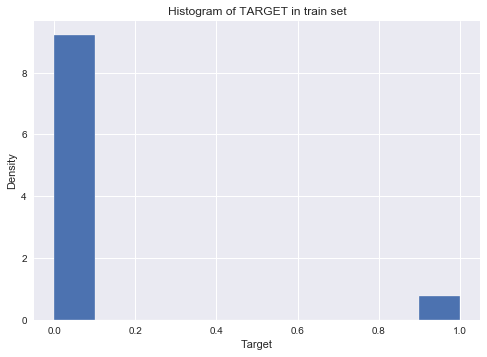

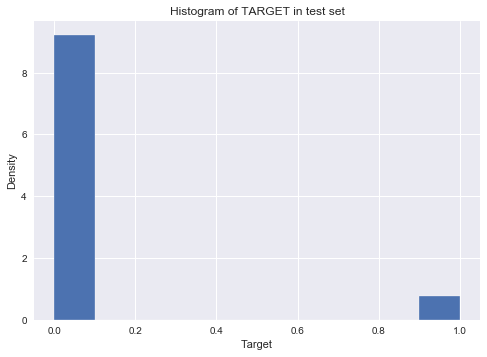

In [72]:
print("Train count values: ", y_train.value_counts())
print("Test count values: ", y_test.value_counts())

plt.title("Histogram of TARGET in train set")
plt.xlabel('Target'); plt.ylabel('Density')
y_train.hist(density=True)
plt.show()

plt.title("Histogram of TARGET in test set")
plt.xlabel('Target'); plt.ylabel('Density')
y_test.hist(density=True)
plt.show()

In [73]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Make the model with the specified inverse regularization parameter
# C: Inverse of regularization strength; must be a positive float
# Smaller values specify stronger regularization => less overfitting
log_reg = LogisticRegression(C = 0.0001, random_state=0) # defaulT C=1

# Train on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, random_state=0)

In [74]:
# Make predictions (probabilities)

# ????
# Select the second column that corresponds to probability of loan not paid (target=1)
# log_reg_pred = log_reg.predict_proba(X_test)[:, 1]
# ... TODO to remove

log_reg_pred = log_reg.predict(X_test)
print(log_reg_pred.shape)

(74110,)


In [75]:
# Plot distribution of probabilities predictions
log_reg_pred_proba_0 = log_reg.predict_proba(X_test)[:, 0]
log_reg_pred_proba_1 = log_reg.predict_proba(X_test)[:, 1]

0.8866336642008572
0.11336633579914285


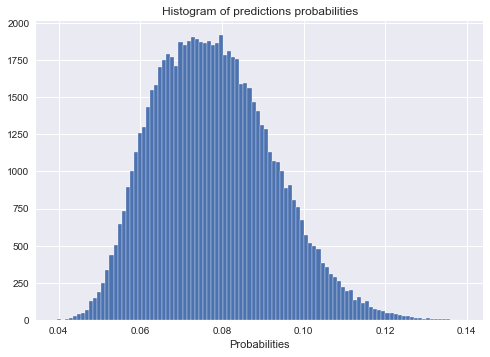

In [76]:
print(log_reg_pred_proba_0[0])
print(log_reg_pred_proba_1[0])

plt.title("Histogram of predictions probabilities(Target=1)")
plt.xlabel("Probabilities")
# TODO: only plot one
#plt.hist([log_reg_pred_proba_0, log_reg_pred_proba_1], label=['Target=0', 'Target=1'], bins=100)
plt.hist(log_reg_pred_proba_1, bins=100)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

In [77]:
# Create submission dataframe to fit format shown in the sample_submission.csv file
# with two columns: SK_ID_CURR and TARGET
# submit = app_test_df[['SK_ID_CURR']]
# pd.options.mode.chained_assignment = None # default='warn'
# submit['TARGET'] =  log_reg_pred

# display(submit.head())
# Save the submission to a csv file
# submit.to_csv('log_reg_baseline.csv', index = False)

In [78]:
# Evaluate logistic regression
# should score around 0.671 with ROC

from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, recall_score, f1_score
auc_scor = roc_auc_score(y_test, log_reg_pred)
print("AUC score: ", auc_scor)

print("Confusion matrix: ")
print(confusion_matrix(y_test, log_reg_pred))

print("Accuracy score: ", accuracy_score(y_test, log_reg_pred))
print("Recall score: ", recall_score(y_test, log_reg_pred))
print("F1-score: ", f1_score(y_test, log_reg_pred))

AUC score:  0.5
Confusion matrix: 
[[68325     0]
 [ 5785     0]]
Accuracy score:  0.921940358925921
Recall score:  0.0
F1-score:  0.0


In [79]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
# n_jobs = -1 means using all processors
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1) # verbose = 1

# Train on the training data
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict(X_test)

# Evaluate
# should score around 0.678 with ROC
auc_scor = roc_auc_score(y_test, predictions)
print("AUC score: ", auc_scor)
print("Confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("Accuracy score: ", accuracy_score(y_test, predictions))
print("Recall score: ", recall_score(y_test, predictions))
print("F1-score: ", f1_score(y_test, predictions))


AUC score:  0.5008569862694853
Confusion matrix: 
[[68324     1]
 [ 5775    10]]
Accuracy score:  0.9220618000269869
Recall score:  0.001728608470181504
F1-score:  0.003450655624568668


In [80]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
# Recall: tp / (tp + fn)
# Precision: tp / (tp + fp)

68324 1 5775 10


In [81]:
# print(app_train_poly.shape)
# app_train_poly.head()

In [82]:
# # Testing polynomial Features
# app_train_poly = app_train_poly.drop(columns = list(app_train_poly.columns[app_train_poly.columns.str.contains(pat = 'TARGET')]))

# poly_features_names = list(app_train_poly.columns)

# # Impute the polynomial features
# imputer = SimpleImputer(strategy = 'median')

# poly_features = imputer.fit_transform(app_train_poly)
# # poly_features_test = imputer.transform(app_test_poly)

# # Scale the polynomial features
# scaler = MinMaxScaler(feature_range = (0, 1))

# poly_features = scaler.fit_transform(poly_features)
# # poly_features_test = scaler.transform(poly_features_test)

# X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(poly_features, y_set, 
#                                                                         stratify=y_set, test_size=0.3, random_state=0)


# random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)

In [83]:
# # Train on the training data
# random_forest_poly.fit(X_train_poly, y_train_poly)

# # Make predictions on the test data
# predictions = random_forest_poly.predict(X_test_poly)

In [84]:
# # Evaluate
# auc_scor = roc_auc_score(y_test_poly, predictions)
# print("AUC score: ", auc_scor)
# print("Confusion matrix: ")
# print(confusion_matrix(y_test_poly, predictions))
# print("Accuracy score: ", accuracy_score(y_test_poly, predictions))
# print("Recall score: ", recall_score(y_test_poly, predictions))
# print("F1-score: ", f1_score(y_test_poly, predictions))

In [85]:
# # Testing Domain Features
# app_train_domain = app_train_domain.drop(columns = 'TARGET')

# domain_features_names = list(app_train_domain.columns)

# # Impute the domainnomial features
# imputer = SimpleImputer(strategy = 'median')

# domain_features = imputer.fit_transform(app_train_domain)
# # domain_features_test = imputer.transform(app_test_domain)

# # Scale the domainnomial features
# scaler = MinMaxScaler(feature_range = (0, 1))

# domain_features = scaler.fit_transform(domain_features)
# # domain_features_test = scaler.transform(domain_features_test)

# X_train_domain, X_test_domain, y_train_domain, y_test_domain = train_test_split(domain_features, y_set, 
#                                                                         stratify=y_set, test_size=0.3, random_state=0)

# random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)

# # Train on the training data
# random_forest_domain.fit(X_train_domain, y_train_domain)

# # Extract feature importances
# feature_importance_values_domain = random_forest_domain.feature_importances_
# feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# # Make predictions on the test data
# predictions = random_forest_domain.predict(X_test_domain)

In [86]:
# # Evaluate
# auc_scor = roc_auc_score(y_test_domain, predictions)
# print("AUC score: ", auc_scor)
# print("Confusion matrix: ")
# print(confusion_matrix(y_test_domain, predictions))
# print("Accuracy score: ", accuracy_score(y_test_domain, predictions))
# print("Recall score: ", recall_score(y_test_domain, predictions))
# print("F1-score: ", f1_score(y_test_domain, predictions))

In [87]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=0)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)


(172922, 299)
(318846, 299)


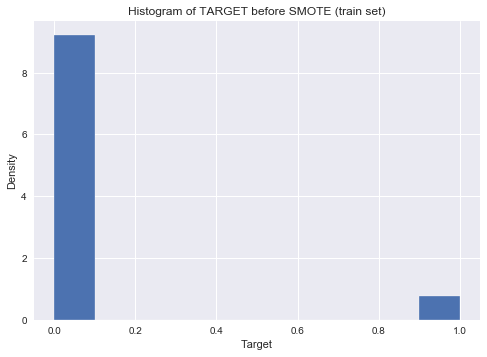

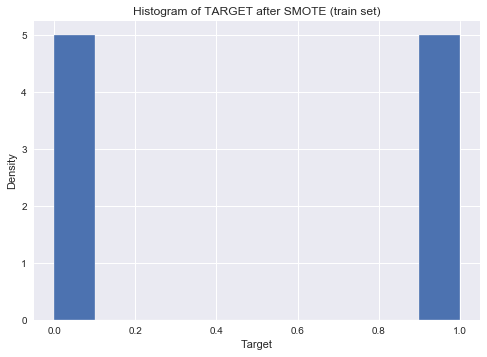

In [88]:
print(X_train.shape)
print(X_train_sm.shape)

plt.title("Histogram of TARGET before SMOTE (train set)")
plt.xlabel("Target")
plt.ylabel("Density")
y_train.hist(density=True)
plt.show()

plt.title("Histogram of TARGET after SMOTE (train set)")
plt.xlabel("Target")
plt.ylabel("Density")
y_train_sm.hist(density=True)
plt.show()

In [89]:
log_reg = LogisticRegression(C = 0.0001, random_state=0) # defaulT C=1

# Train on the training data
log_reg.fit(X_train_sm, y_train_sm)


LogisticRegression(C=0.0001, random_state=0)

In [90]:
log_reg_pred_sm = log_reg.predict(X_test_sm)
log_reg_pred_proba_sm = log_reg.predict_proba(X_test_sm)

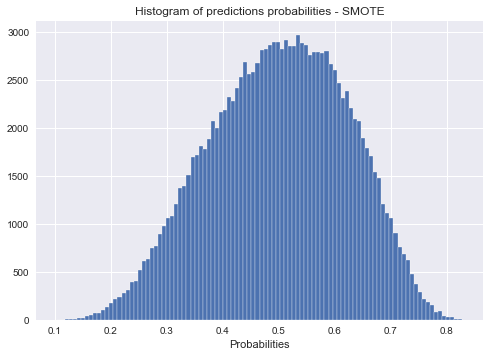

In [91]:
plt.title("Histogram of predictions probabilities - SMOTE (Target=1)")
plt.xlabel("Probabilities")
# plt.hist([log_reg_pred_proba_sm[:,0], log_reg_pred_proba_sm[:,1]], label=['Target=0', 'Target=1'], bins=100)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.hist([log_reg_pred_proba_sm[:,1]], bins=100)
plt.show()

In [92]:
auc_scor = roc_auc_score(y_test_sm, log_reg_pred_sm)
print("AUC score: ", auc_scor)

print("Confusion matrix: ")
print(confusion_matrix(y_test_sm, log_reg_pred_sm))

print("Accuracy score: ", accuracy_score(y_test_sm, log_reg_pred_sm))
print("Recall score: ", recall_score(y_test_sm, log_reg_pred_sm))
print("F1-score: ", f1_score(y_test_sm, log_reg_pred_sm))

AUC score:  0.6857153311379437
Confusion matrix: 
[[45808 22517]
 [20430 47895]]
Accuracy score:  0.6857153311379437
Recall score:  0.7009879253567508
F1-score:  0.690443068539755


In [93]:
# Make the random forest classifier
# n_jobs = -1 means using all processors
# 'n_estimators': 100, 15O: no difference when evaluated
# 'max_depth' : range(1, 20, 5),
# 'criterion': ['gini', 'entropy']: no difference when evaluated
# entropy (gain information)
random_forest_sm = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1) # verbose = 1

# Train on the training data
random_forest_sm.fit(X_train_sm, y_train_sm)

# Extract feature importances
feature_importance_values_sm = random_forest_sm.feature_importances_
feature_importances_sm = pd.DataFrame({'feature': features, 'importance': feature_importance_values_sm})

# Make predictions on the test data
predictions_sm = random_forest_sm.predict(X_test_sm)

# Evaluate
auc_scor = roc_auc_score(y_test_sm, predictions_sm)
print("AUC score: ", auc_scor)
print("Confusion matrix: ")
print(confusion_matrix(y_test_sm, predictions_sm))
print("Accuracy score: ", accuracy_score(y_test_sm, predictions_sm))
print("Recall score: ", recall_score(y_test_sm, predictions_sm))
print("F1-score: ", f1_score(y_test_sm, predictions_sm))


AUC score:  0.9520673252835712
Confusion matrix: 
[[68287    38]
 [ 6512 61813]]
Accuracy score:  0.9520673252835712
Recall score:  0.904690815953165
F1-score:  0.949683505408063


# PCA

In [94]:
print(merged_df.shape)
print(X_train_sm.shape)

(247032, 300)
(318846, 299)


[1.00347807e-01 8.22087533e-02 5.94536105e-02 4.42913262e-02
 3.72803659e-02 3.23411718e-02 2.93355545e-02 2.81178303e-02
 2.52490226e-02 2.44104629e-02 2.40074364e-02 2.29950340e-02
 2.19235974e-02 1.96125153e-02 1.93393757e-02 1.92044480e-02
 1.90013497e-02 1.84487214e-02 1.67825368e-02 1.50767883e-02
 1.42124202e-02 1.38454143e-02 1.29163947e-02 1.25787136e-02
 1.18883795e-02 1.13304284e-02 9.93613605e-03 8.75148034e-03
 8.56680276e-03 8.49201801e-03 8.05808724e-03 7.87929294e-03
 7.61649763e-03 7.35653392e-03 7.20743273e-03 6.82719329e-03
 6.50810647e-03 5.94810081e-03 5.51861867e-03 5.46743889e-03
 5.28951139e-03 5.21563704e-03 4.99654619e-03 4.93940300e-03
 4.76151983e-03 4.64918160e-03 4.51653955e-03 4.33337000e-03
 4.23551496e-03 4.17997101e-03 3.77737104e-03 3.58072080e-03
 3.37313525e-03 3.15187715e-03 3.06336309e-03 3.01633724e-03
 2.87123573e-03 2.65381811e-03 2.64976979e-03 2.58788717e-03
 2.48339146e-03 2.38133695e-03 2.36223741e-03 2.33858302e-03
 2.22732769e-03 2.151057

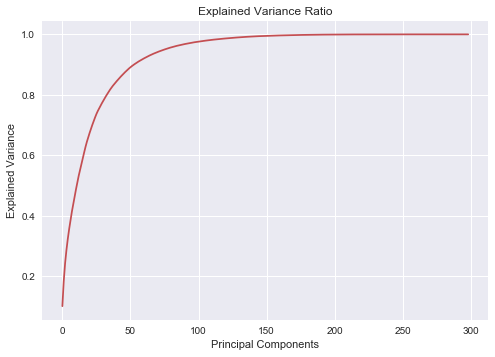

(-1, 1)

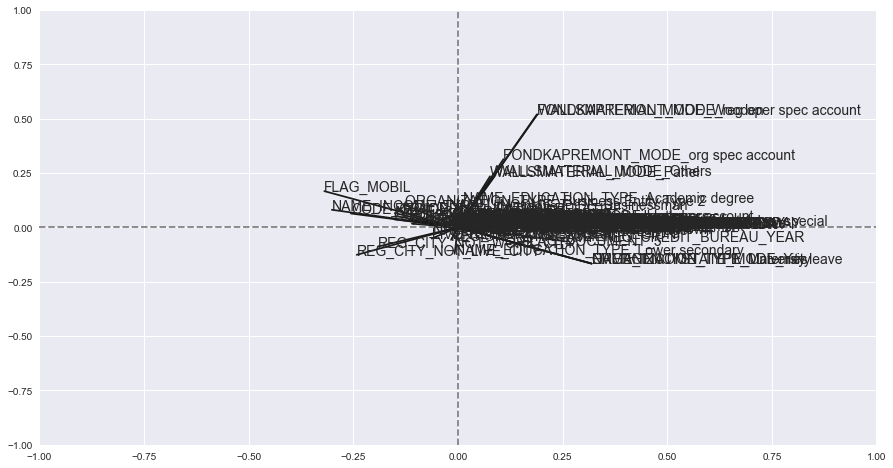

In [96]:
from sklearn import decomposition

n_comp = 299 # 150
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_train_sm)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


cumulative = np.cumsum(pca.explained_variance_ratio_)
print(cumulative)

plt.plot(range(0, n_comp), cumulative, 'r')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

pcs = pca.components_

fig = plt.figure(figsize=(15,8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, merged_df.columns[i], fontsize='14')

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlim([-1, 1])
plt.ylim([-1, 1])

In [97]:
X_train_sm_pca = pca.transform(X_train_sm)
X_test_sm_pca = pca.transform(X_test_sm)

print(X_train_sm_pca.shape)
print(X_test_sm_pca.shape)

(318846, 299)
(136650, 299)


In [98]:

random_forest_sm_pca = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1) # verbose = 1

# Train on the training data
random_forest_sm_pca.fit(X_train_sm_pca, y_train_sm)

# Extract feature importances
# feature_importance_values_sm_pca = random_forest_sm_pca.feature_importances_
# feature_importances_sm_pca = pd.DataFrame({'feature': features, 'importance': feature_importance_values_sm_pca})

# Make predictions on the test data
predictions_sm_pca = random_forest_sm_pca.predict(X_test_sm_pca)

# Evaluate
auc_scor = roc_auc_score(y_test_sm, predictions_sm_pca)
print("AUC score: ", auc_scor)
print("Confusion matrix: ")
print(confusion_matrix(y_test_sm, predictions_sm_pca))
print("Accuracy score: ", accuracy_score(y_test_sm, predictions_sm_pca))
print("Recall score: ", recall_score(y_test_sm, predictions_sm_pca))
print("F1-score: ", f1_score(y_test_sm, predictions_sm_pca))

AUC score:  0.6847420417124039
Confusion matrix: 
[[65683  2642]
 [40438 27887]]
Accuracy score:  0.6847420417124039
Recall score:  0.4081522136845957
F1-score:  0.5642057984502397


Feature ranking:
1. feature 295: NAME_YIELD_GROUP_high (0.038574)
2. feature 278: NAME_PORTFOLIO_Cards (0.033852)
3. feature 33: EXT_SOURCE_3 (0.032939)
4. feature 294: NAME_YIELD_GROUP_XNA (0.029613)
5. feature 32: EXT_SOURCE_2 (0.027746)
6. feature 282: NAME_PORTFOLIO_XNA (0.027128)
7. feature 274: NAME_CLIENT_TYPE_New (0.027005)
8. feature 284: NAME_PRODUCT_TYPE_walk-in (0.025947)
9. feature 79: OBS_60_CNT_SOCIAL_CIRCLE (0.024711)
10. feature 77: OBS_30_CNT_SOCIAL_CIRCLE (0.024515)
11. feature 290: CHANNEL_TYPE_Country-wide (0.022948)
12. feature 297: NAME_YIELD_GROUP_low_normal (0.021528)
13. feature 257: CREDIT_ACTIVE_Active (0.021503)
14. feature 280: NAME_PORTFOLIO_Cash (0.020679)
15. feature 298: NAME_YIELD_GROUP_middle (0.020514)
16. feature 281: NAME_PORTFOLIO_POS (0.018205)
17. feature 4: CNT_CHILDREN (0.017888)
18. feature 107: AMT_REQ_CREDIT_BUREAU_YEAR (0.017714)
19. feature 283: NAME_PRODUCT_TYPE_XNA (0.016476)
20. feature 253: NAME_CONTRACT_STATUS_Signed (0.015878)
21. 

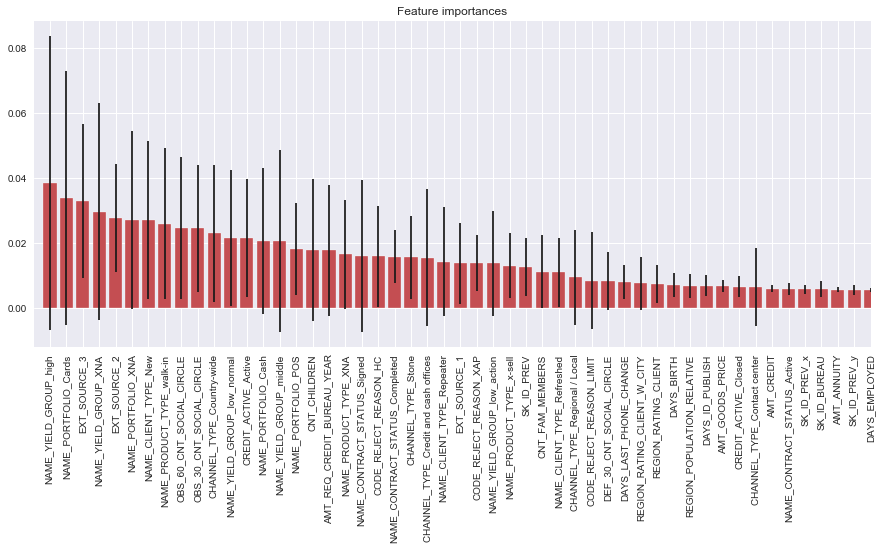

In [99]:
# Show features importances
std = np.std([tree.feature_importances_ for tree in random_forest_sm.estimators_],
             axis=0)
indices = np.argsort(feature_importance_values_sm)[::-1]

# Print and plot the feature ranking
print("Feature ranking:")

for f in range(len(features)):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], features[indices[f]] , feature_importance_values_sm[indices[f]]))

# Plot the impurity-based feature importances of the forest
# plt.figure()
fig = plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(len(features)), feature_importance_values_sm[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(features)), np.array(features)[indices], rotation=90)
# plt.xlim([-1, len(features)])
plt.xlim([-1, 50])

plt.show()



In [99]:
# Permutation Feature Importance
from sklearn.inspection import permutation_importance

# n_repeats=5

perm_importance = permutation_importance(random_forest_sm, X_test_sm, y_test_sm)

In [100]:
print(type(perm_importance))

<class 'sklearn.utils.Bunch'>


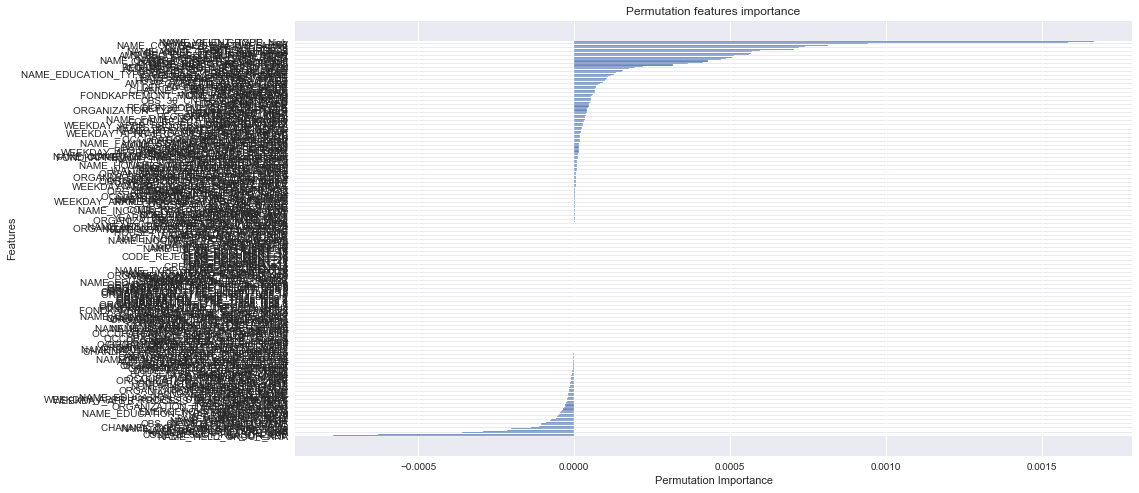

In [101]:
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(15,8))
plt.barh(np.array(features)[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Permutation features importance")
# plt.ylim([50, 0])
plt.show()

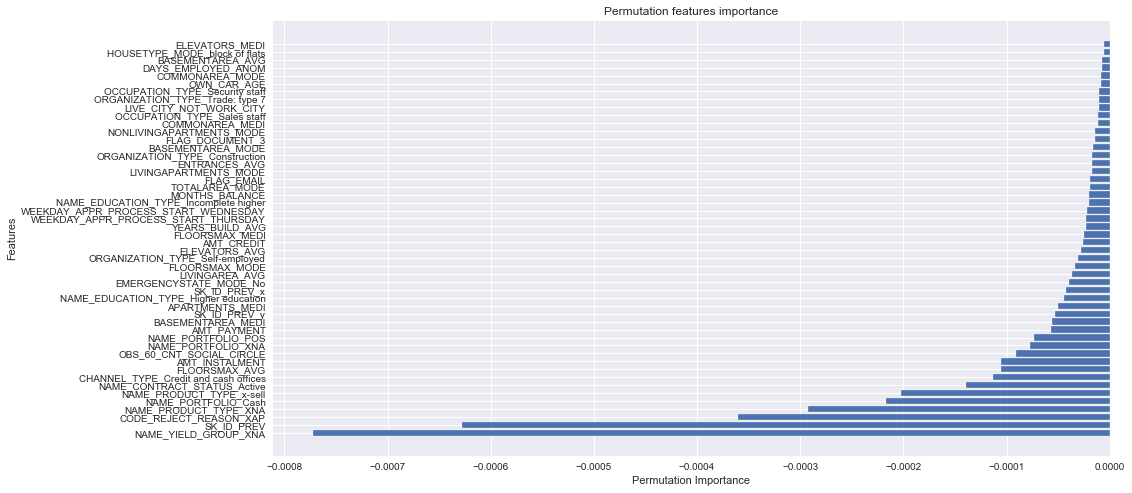

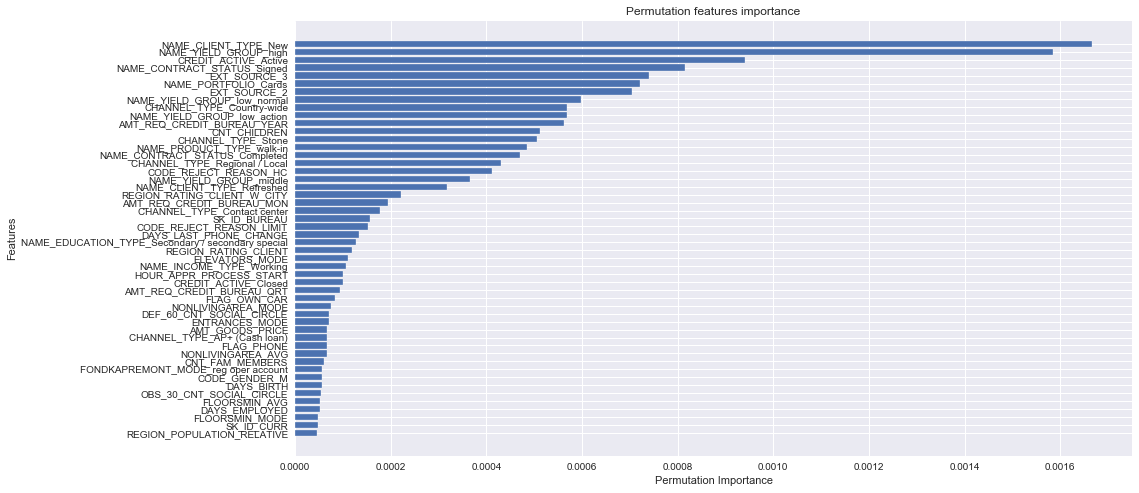

In [102]:
sorted_idx = perm_importance.importances_mean.argsort()

fig = plt.figure(figsize=(15,8))
plt.barh(np.array(features)[sorted_idx[:50]], perm_importance.importances_mean[sorted_idx[:50]])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Permutation features importance")
# plt.ylim([50, 0])
plt.show()

fig = plt.figure(figsize=(15,8))
plt.barh(np.array(features)[sorted_idx[-50:]], perm_importance.importances_mean[sorted_idx[-50:]])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Permutation features importance")
# plt.ylim([50, 0])
plt.show()

In [103]:
# Do cross validation when evaluating before doing a PFI
# Check that there is no correlation (otherwise biased)

In [100]:
params = random_forest_sm.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [101]:
list_est_leaves = [est.get_n_leaves() for est in random_forest_sm.estimators_]
print("Min of estimators n_leaves: ", min(list_est_leaves))
print("Max of estimators n_leaves: ", max(list_est_leaves))
print("Mean of estimators n_leaves: ", sum(list_est_leaves)/len(list_est_leaves))

Min of estimators n_leaves:  19215
Max of estimators n_leaves:  22368
Mean of estimators n_leaves:  20910.7


In [102]:
list_est_depth = [est.get_depth() for est in random_forest_sm.estimators_]
print("Min of estimators depth: ", min(list_est_depth))
print("Max of estimators depth: ", max(list_est_depth))
print("Mean of estimators depth: ", sum(list_est_depth)/len(list_est_depth))

Min of estimators depth:  40
Max of estimators depth:  64
Mean of estimators depth:  46.91


In [103]:
random_forest_shap = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1, max_depth=10,
                                           max_leaf_nodes=40) # verbose = 1

# Train on the training data
random_forest_shap.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=10, max_leaf_nodes=40, n_jobs=-1,
                       random_state=0)

In [104]:
# Make predictions on the test data
predictions_shap = random_forest_shap.predict(X_test_sm)

# Evaluate
auc_scor = roc_auc_score(y_test_sm, predictions_shap)
print("AUC score: ", auc_scor)
print("Confusion matrix: ")
print(confusion_matrix(y_test_sm, predictions_shap))
print("Accuracy score: ", accuracy_score(y_test_sm, predictions_shap))
print("Recall score: ", recall_score(y_test_sm, predictions_shap))
print("F1-score: ", f1_score(y_test_sm, predictions_shap))


AUC score:  0.9073545554335893
Confusion matrix: 
[[64248  4077]
 [ 8583 59742]]
Accuracy score:  0.9073545554335894
Recall score:  0.8743798024149286
F1-score:  0.9041954231747185


Feature ranking:
1. feature 33: EXT_SOURCE_3 (0.064436)
2. feature 295: NAME_YIELD_GROUP_high (0.057575)
3. feature 278: NAME_PORTFOLIO_Cards (0.049075)
4. feature 282: NAME_PORTFOLIO_XNA (0.047404)
5. feature 274: NAME_CLIENT_TYPE_New (0.045904)
6. feature 79: OBS_60_CNT_SOCIAL_CIRCLE (0.042079)
7. feature 284: NAME_PRODUCT_TYPE_walk-in (0.040085)
8. feature 294: NAME_YIELD_GROUP_XNA (0.037361)
9. feature 32: EXT_SOURCE_2 (0.036318)
10. feature 257: CREDIT_ACTIVE_Active (0.033753)
11. feature 290: CHANNEL_TYPE_Country-wide (0.032082)
12. feature 77: OBS_30_CNT_SOCIAL_CIRCLE (0.029804)
13. feature 280: NAME_PORTFOLIO_Cash (0.029204)
14. feature 4: CNT_CHILDREN (0.028334)
15. feature 266: CODE_REJECT_REASON_HC (0.026165)
16. feature 285: NAME_PRODUCT_TYPE_x-sell (0.024609)
17. feature 297: NAME_YIELD_GROUP_low_normal (0.023329)
18. feature 107: AMT_REQ_CREDIT_BUREAU_YEAR (0.022985)
19. feature 276: NAME_CLIENT_TYPE_Repeater (0.020866)
20. feature 31: EXT_SOURCE_1 (0.020633)
21. feature 

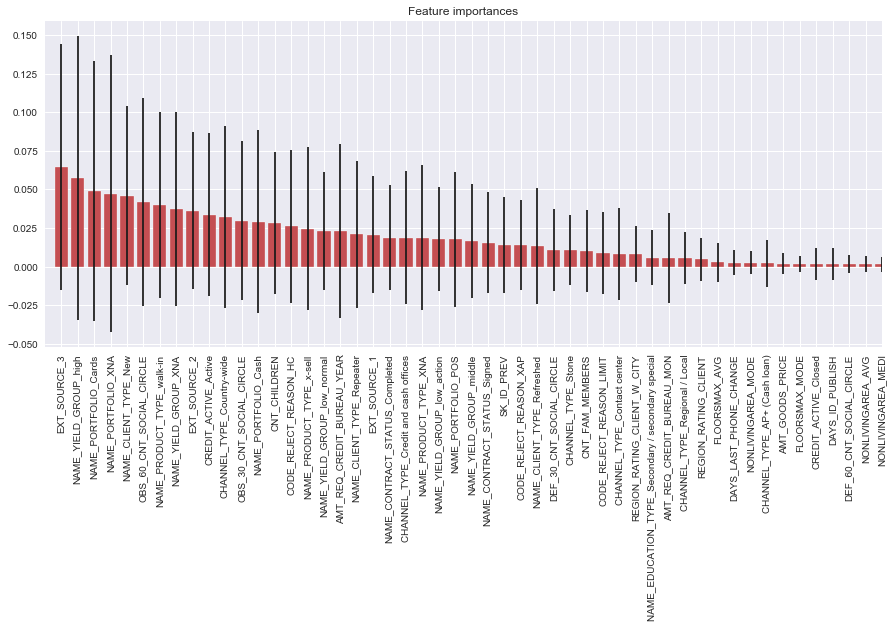

In [105]:
# Show features importances
std = np.std([tree.feature_importances_ for tree in random_forest_shap.estimators_],
             axis=0)
feature_importance_values_shap = random_forest_shap.feature_importances_
indices = np.argsort(feature_importance_values_shap)[::-1]

# Print and plot the feature ranking
print("Feature ranking:")

for f in range(len(features)):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], features[indices[f]] , feature_importance_values_shap[indices[f]]))

# Plot the impurity-based feature importances of the forest
# plt.figure()
fig = plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(len(features)), feature_importance_values_shap[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(features)), np.array(features)[indices], rotation=90)
# plt.xlim([-1, len(features)])
plt.xlim([-1, 50])

plt.show()

In [160]:
# Permutation Feature Importance

# n_repeats=5
perm_importance_shap = permutation_importance(random_forest_shap, X_test_sm, y_test_sm)

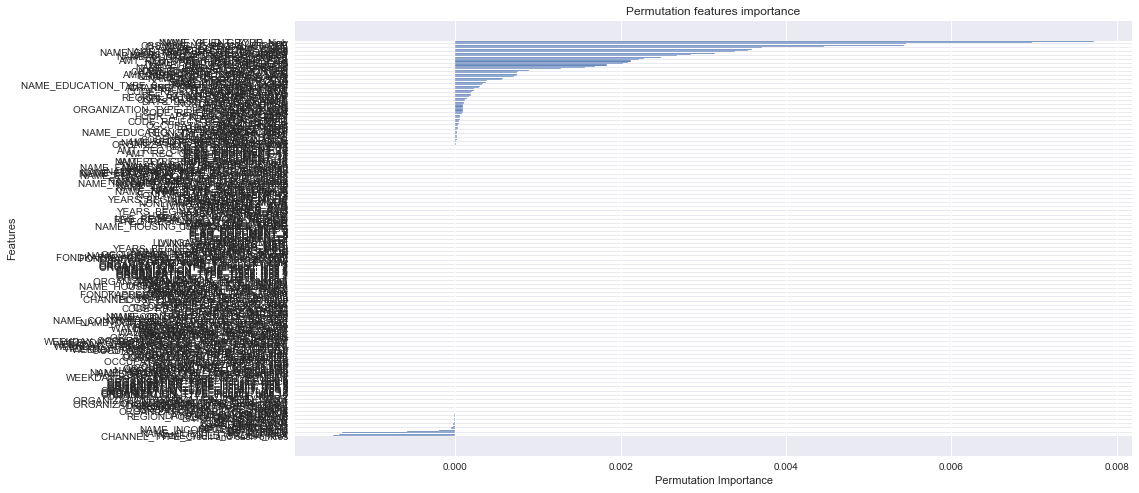

In [161]:
sorted_idx = perm_importance_shap.importances_mean.argsort()
fig = plt.figure(figsize=(15,8))
plt.barh(np.array(features)[sorted_idx], perm_importance_shap.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Permutation features importance")
# plt.ylim([50, 0])
plt.show()

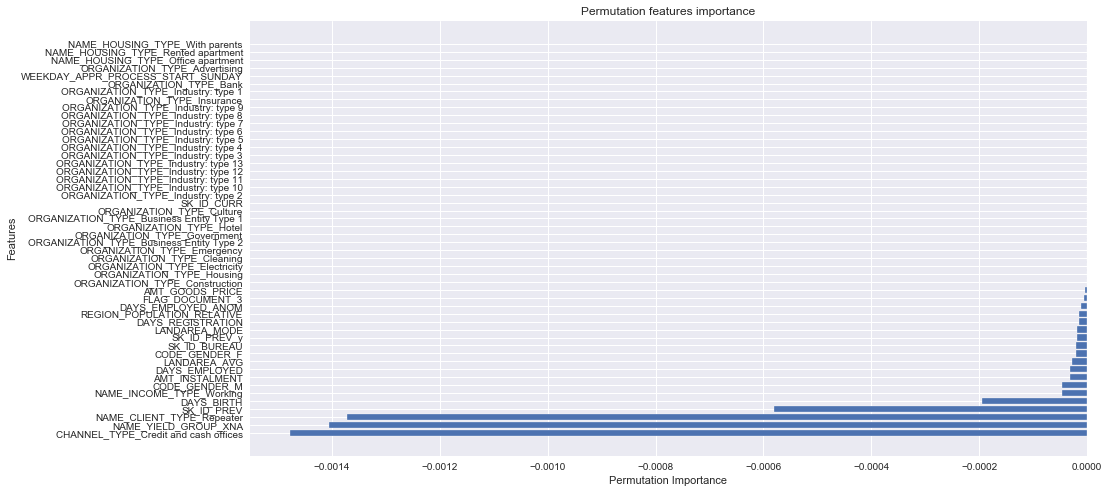

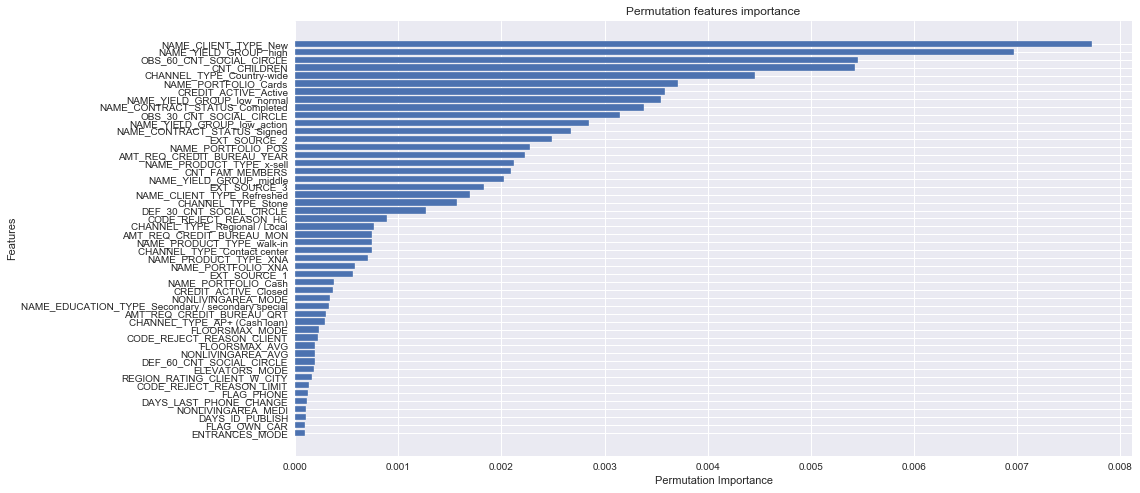

In [162]:
sorted_idx = perm_importance_shap.importances_mean.argsort()

fig = plt.figure(figsize=(15,8))
plt.barh(np.array(features)[sorted_idx[:50]], perm_importance_shap.importances_mean[sorted_idx[:50]])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Permutation features importance")
# plt.ylim([50, 0])
plt.show()

fig = plt.figure(figsize=(15,8))
plt.barh(np.array(features)[sorted_idx[-50:]], perm_importance_shap.importances_mean[sorted_idx[-50:]])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Permutation features importance")
# plt.ylim([50, 0])
plt.show()

In [104]:
# SHAP
import shap

# load JS visualization code to notebook (in particular force_plot?)
shap.initjs()

explainer = shap.TreeExplainer(random_forest_shap)


In [105]:
# Do this on test set because it is what we want to explain
shap_values = explainer.shap_values(X_test_sm) # approximate=True

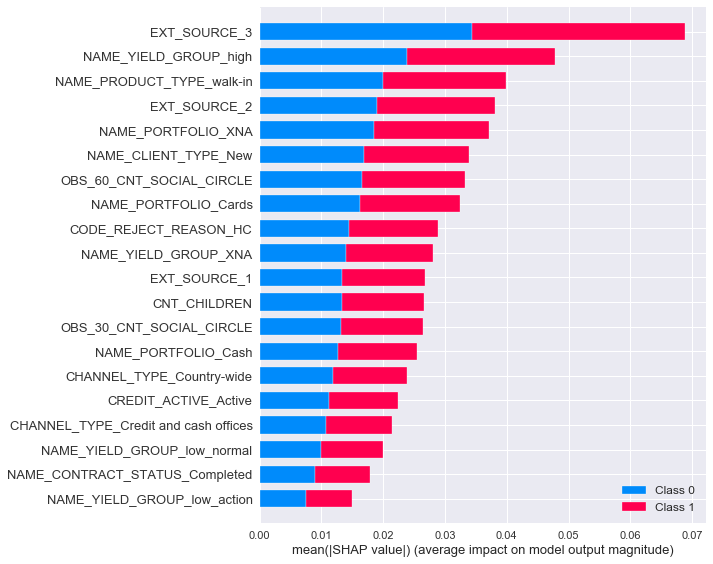

In [106]:
# Variable Importance Plot — Global Interpretability
# Only plot_type = 'bar' is supported for multi-output explanations!
# plot_type="compact_dot"
shap.summary_plot(shap_values, X_test_sm, plot_type="bar", feature_names=np.array(features))

In [ ]:
# TODO do not stack both of them
# add only one (target=1) (bar plot)

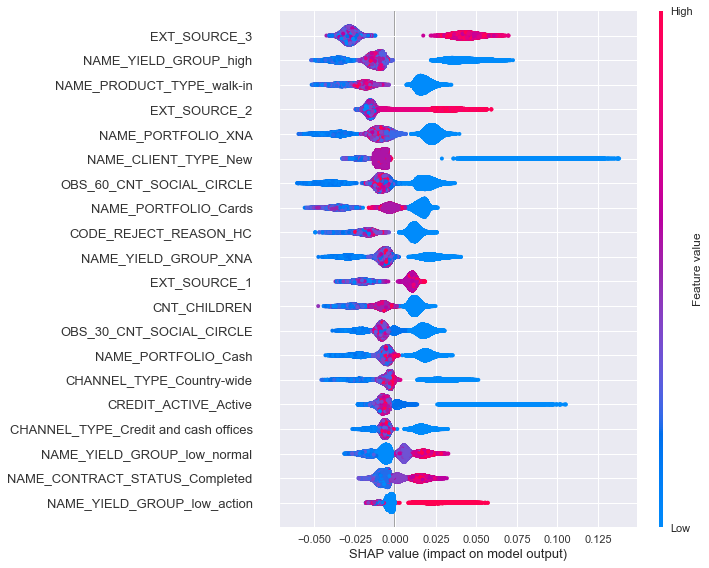

In [107]:
shap.summary_plot(shap_values[0], X_test_sm, feature_names=np.array(features))

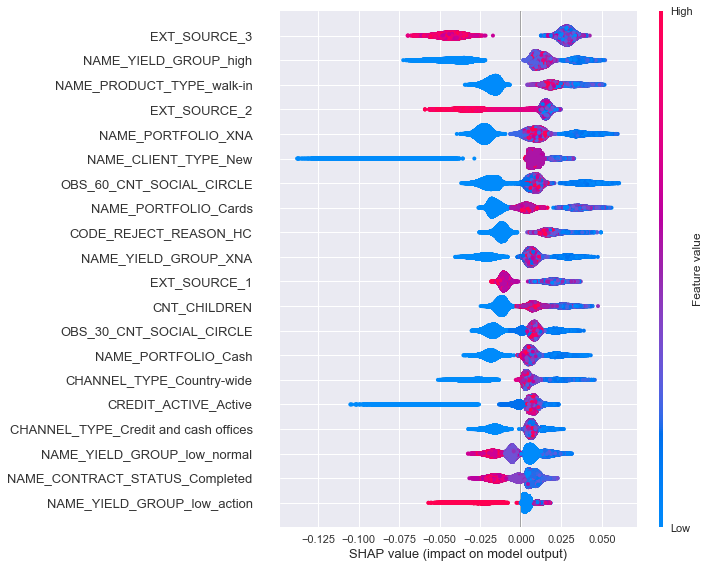

In [108]:
shap.summary_plot(shap_values[1], X_test_sm, feature_names=np.array(features))

In [109]:
# Individual SHAP Value Plot — Local Interpretability
# Visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_sm.iloc[0,:])
print((explainer.expected_value[0]))
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_sm[0,:])

0.5000041399296211


In [110]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_sm[0,:],
                feature_names=np.array(features)) #, matplotlib=True)

In [111]:
print((explainer.expected_value[1]))
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test_sm[0,:])

0.4999958600703789


In [112]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test_sm[0,:], feature_names=np.array(features))

In [113]:
# Visualize the test set predictions
# shap.force_plot(explainer.expected_value[0], shap_values[0][:1000,:], X_test_sm[:1000,:])

In [114]:
print((shap_values[0].shape))
print(X_test_sm.shape)

(136650, 299)
(136650, 299)


# Dashboard info

In [137]:
print(type(shap_values))
print(len(shap_values))

print(type(shap_values[0]))
print((shap_values[0].shape))
print((shap_values[1].shape))

<class 'list'>
2
<class 'numpy.ndarray'>
(136650, 299)
(136650, 299)


In [157]:
# Store info for dashboard

# Interactive dashboard:
# Visualize each client's score and its interpretability for laypersons
# With a filtering system: visualize each client's descriptive info 
# Can compare a client's descriptive info to the similar clients' or group of clients'

# Save final dataframe
# Put features and X_test_sm and y_test_sm in dataframe
# Copy list of features
features_targ = features[:]
# Append target
features_targ.append('TARGET')
print(len(features))
print(len(features_targ))

# Create dataframe to store
data_to_store = pd.DataFrame(data=np.column_stack((X_test_sm, y_test_sm)), columns=features_targ) # reset index?
print(data_to_store.shape)
display(data_to_store.head())

# Store dataframe
data_to_store.to_csv("data_dashboard.csv")  # encoding='utf-8'

# Save model
import joblib 
# Save the model as a pickle in a file 
joblib.dump(random_forest_shap, 'random_forest_shap.pkl') 
  

# Save shap values
# TODO:
# Just report these values directly to python app
# explainer.expected_value[0]
# explainer.expected_value[1]

# Store shap_values
from numpy import savez_compressed

# save to npz file
savez_compressed('shap_values_0.npz', shap_values[0])
savez_compressed('shap_values_1.npz', shap_values[1])

299
300
(136650, 300)


SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0    0.714324                 0.0           1.0              1.0   
1    0.341763                 0.0           0.0              1.0   
2    0.196268                 0.0           0.0              0.0   
3    0.003366                 0.0           0.0              1.0   
4    0.827830                 0.0           0.0              0.0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      0.052632          0.000662    0.051716     0.072078         0.048751   
1      0.105263          0.000762    0.139995     0.137245         0.108205   
2      0.000000          0.001700    0.229414     0.129429         0.167658   
3      0.105263          0.000623    0.034516     0.057956         0.036861   
4      0.000000          0.000469    0.195243     0.110131         0.167658   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.048783    0.511235       0.962595           0.866326   
1                    0.311695    0.582938       0.960027           0.952943   
2                    0.256321    0.820178       0.958687           0.846060   
3                    0.143358    0.707148       0.964102           0.590507   
4                    0.196267    0.553579       0.871594           0.636552   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0         0.957343     0.186813         0.0             1.0              1.0   
1         0.390996     0.098901         0.0             1.0              0.0   
2         0.538141     0.098901         0.0             1.0              0.0   
3         0.772405     0.098901         0.0             1.0              0.0   
4         0.467834     0.098901         0.0             1.0              0.0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0               1.0         1.0         0.0         0.105263   
1               1.0         0.0         0.0         0.157895   
2               1.0         0.0         1.0         0.052632   
3               1.0         1.0         0.0         0.105263   
4               1.0         0.0         0.0         0.000000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                   0.5                          0.5                 0.304348   
1                   0.5                          0.5                 0.347826   
2                   0.5                          0.5                 0.608696   
3                   0.5                          0.5                 0.565217   
4                   0.5                          0.5                 0.217391   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     1.0   
3                          0.0                     0.0   
4                          0.0                     0.0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                     1.0                      1.0      0.523821   
1                     0.0                      0.0      0.582837   
2                     1.0                      0.0      0.345687   
3                     0.0                      0.0      0.523821   
4                     0.0                      0.0      0.523821   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.381715      0.413322          0.0866            0.0761   
1      0.545985      0.807732   

In [ ]:
# # Load the model from the file 
# random_forest_shap = joblib.load('random_forest_shap.pkl')
# # Use the loaded model to make predictions 
# random_forest_shap.predict(X_test_sm)

# # Load data from CSV file
# data_to_store = pd.read_csv("data_dashboard.csv")


# from numpy import load
# # load dict of arrays
# dict_data = load('shap_values_1.npz')
# # extract the first array
# data = dict_data['arr_0']
# # print the array
# print(data.shape)

# if np.array_equal(data, shap_values[1]):
#     print("ok")
# else:
#     print("NOT OK")


In [182]:
orig_data_to_store = merged_df.copy()
if 'TARGET' in merged_df:
    X_to_store = merged_df.drop(columns = ['TARGET'])
else:
    X_to_store = merged_df.copy()
y_to_store = merged_df['TARGET']

X_to_store_train, X_to_store_test, y_to_store_train, y_to_store_test = train_test_split(X_to_store, y_to_store,
                                                                                        stratify=y_to_store, test_size=0.3,
                                                                                        random_state=0)


In [183]:
print(X_to_store_test.shape)
print(X_test.shape)
y_to_store_test.head()

(74110, 299)
(74110, 299)


176354    0
84318     0
48566     1
832       1
205000    0
Name: TARGET, dtype: int64

In [179]:
# X_to_store_test = X_to_store_test.reset_index()
# display(X_to_store_test.head())
# y_to_store_test = y_to_store_test.reset_index()
# display(y_to_store_test.head())

index  SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0  176354      354482                   0             1                1   
1   84318      221756                   0             0                1   
2   48566      169923                   0             0                0   
3     832      101201                   0             0                1   
4  205000      394919                   0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             1          103500.0    247275.0      17716.5         225000.0   
1             2          115200.0    592560.0      32274.0         450000.0   
2             0          225000.0    942300.0      30528.0         675000.0   
3             2           99000.0    180000.0      14562.0         180000.0   
4             0           81000.0    808650.0      26217.0         675000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.003813      -16146         -670.0            -3298.0   
1                    0.022800      -14876         -716.0            -1161.0   
2                    0.018801      -10674         -740.0            -3798.0   
3                    0.010643      -12676         -643.0           -10103.0   
4                    0.014464      -15396        -2300.0            -8967.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -307         17.0           1               1                1   
1            -4383          NaN           1               1                0   
2            -3324          NaN           1               1                0   
3            -1638          NaN           1               1                0   
4            -3830          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              3.0   
1                 1           0           0              4.0   
2                 1           0           1              2.0   
3                 1           1           0              3.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                        7   
1                     2                            2                        8   
2                     2                            2                       14   
3                     2                            2                       13   
4                     2                            2                        5   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       1   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       1                        1           NaN   
1                       0                        0      0.567170   
2                       1                        0      0.342322   
3                       0                        0           NaN   
4                       0                        0           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.326367      0.370650             NaN       

index  TARGET
0  176354       0
1   84318       0
2   48566       1
3     832       1
4  205000       0

In [190]:
print(X_to_store_test.shape)
print(y_to_store_test.shape)
display(X_to_store_test.head())
display(y_to_store_test.head())

print(X_test.shape)
print(y_test.shape)

(74110, 299)
(74110,)


SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
176354      354482                   0             1                1   
84318       221756                   0             0                1   
48566       169923                   0             0                0   
832         101201                   0             0                1   
205000      394919                   0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
176354             1          103500.0    247275.0      17716.5   
84318              2          115200.0    592560.0      32274.0   
48566              0          225000.0    942300.0      30528.0   
832                2           99000.0    180000.0      14562.0   
205000             0           81000.0    808650.0      26217.0   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
176354         225000.0                    0.003813      -16146   
84318          450000.0                    0.022800      -14876   
48566          675000.0                    0.018801      -10674   
832            180000.0                    0.010643      -12676   
205000         675000.0                    0.014464      -15396   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
176354         -670.0            -3298.0             -307         17.0   
84318          -716.0            -1161.0            -4383          NaN   
48566          -740.0            -3798.0            -3324          NaN   
832            -643.0           -10103.0            -1638          NaN   
205000        -2300.0            -8967.0            -3830          NaN   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
176354           1               1                1                 1   
84318            1               1                0                 1   
48566            1               1                0                 1   
832              1               1                0                 1   
205000           1               1                0                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
176354           1           0              3.0                     2   
84318            0           0              4.0                     2   
48566            0           1              2.0                     2   
832              1           0              3.0                     2   
205000           0           0              1.0                     2   

        REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
176354                            2                        7   
84318                             2                        8   
48566                             2                       14   
832                               2                       13   
205000                            2                        5   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
176354                           0                           0   
84318                            0                           0   
48566                            0                           0   
832                              0                           0   
205000                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
176354                            0                       0   
84318                             0                       0   
48566                             0                       1   
832                               0                       0   
205000                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
176354                       1                        1           NaN   
84318                        0                        0      0.567170   
48566                        1                        0     

176354    0
84318     0
48566     1
832       1
205000    0
Name: TARGET, dtype: int64

(74110, 299)
(74110,)


In [191]:
predictions_clients = random_forest_shap.predict(X_test)

In [195]:
# Store predictions of original test clients
savez_compressed('predictions_clients.npz', predictions_clients)


In [200]:
data_to_store_orig = pd.DataFrame(data=np.column_stack((X_to_store_test, y_to_store_test)), columns=features_targ)
print(data_to_store_orig.shape)
display(data_to_store_orig.head())

(74110, 300)


SK_ID_CURR NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN  \
0     354482                  0            1               1            1   
1     221756                  0            0               1            2   
2     169923                  0            0               0            0   
3     101201                  0            0               1            2   
4     394919                  0            0               0            0   

  AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE  \
0           103500     247275     17716.5          225000   
1           115200     592560       32274          450000   
2           225000     942300       30528          675000   
3            99000     180000       14562          180000   
4            81000     808650       26217          675000   

  REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION  \
0                   0.003813     -16146          -670             -3298   
1                     0.0228     -14876          -716             -1161   
2                   0.018801     -10674          -740             -3798   
3                   0.010643     -12676          -643            -10103   
4                   0.014464     -15396         -2300             -8967   

  DAYS_ID_PUBLISH OWN_CAR_AGE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0            -307          17          1              1               1   
1           -4383         NaN          1              1               0   
2           -3324         NaN          1              1               0   
3           -1638         NaN          1              1               0   
4           -3830         NaN          1              1               0   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0                1          1          0               3                    2   
1                1          0          0               4                    2   
2                1          0          1               2                    2   
3                1          1          0               3                    2   
4                1          0          0               1                    2   

  REGION_RATING_CLIENT_W_CITY HOUR_APPR_PROCESS_START  \
0                           2                       7   
1                           2                       8   
2                           2                      14   
3                           2                      13   
4                           2                       5   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0                           0                      0                      1   
1                           0                      0                      0   
2                           0                      1                      1   
3                           0                      0                      0   
4                           0                      0                      0   

  LIVE_CITY_NOT_WORK_CITY EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  \
0                       1          NaN     0.326367      0.37065   
1                       0      0.56717     0.466817     0.723837   
2                       0     0.342322     0.389136    0.0908147   
3                       0          NaN     0.226273     0.633032   
4                       0          NaN     0.480866     0.593718   

  APARTMENTS_AVG BASEMENTAREA_AVG YEARS_BEGINEXPLUATATION_AVG YEARS_BUILD_AVG  \
0            NaN              NaN                         NaN             NaN   
1            NaN              NaN      

In [202]:
print(predictions_clients.shape)

(74110,)


In [203]:
data_to_store_orig['predictions'] = predictions_clients

In [204]:
print(data_to_store_orig.shape)
display(data_to_store_orig.head())

(74110, 301)


SK_ID_CURR NAME_CONTRACT_TYPE FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN  \
0     354482                  0            1               1            1   
1     221756                  0            0               1            2   
2     169923                  0            0               0            0   
3     101201                  0            0               1            2   
4     394919                  0            0               0            0   

  AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE  \
0           103500     247275     17716.5          225000   
1           115200     592560       32274          450000   
2           225000     942300       30528          675000   
3            99000     180000       14562          180000   
4            81000     808650       26217          675000   

  REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION  \
0                   0.003813     -16146          -670             -3298   
1                     0.0228     -14876          -716             -1161   
2                   0.018801     -10674          -740             -3798   
3                   0.010643     -12676          -643            -10103   
4                   0.014464     -15396         -2300             -8967   

  DAYS_ID_PUBLISH OWN_CAR_AGE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0            -307          17          1              1               1   
1           -4383         NaN          1              1               0   
2           -3324         NaN          1              1               0   
3           -1638         NaN          1              1               0   
4           -3830         NaN          1              1               0   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0                1          1          0               3                    2   
1                1          0          0               4                    2   
2                1          0          1               2                    2   
3                1          1          0               3                    2   
4                1          0          0               1                    2   

  REGION_RATING_CLIENT_W_CITY HOUR_APPR_PROCESS_START  \
0                           2                       7   
1                           2                       8   
2                           2                      14   
3                           2                      13   
4                           2                       5   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0                           0                      0                      1   
1                           0                      0                      0   
2                           0                      1                      1   
3                           0                      0                      0   
4                           0                      0                      0   

  LIVE_CITY_NOT_WORK_CITY EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  \
0                       1          NaN     0.326367      0.37065   
1                       0      0.56717     0.466817     0.723837   
2                       0     0.342322     0.389136    0.0908147   
3                       0          NaN     0.226273     0.633032   
4                       0          NaN     0.480866     0.593718   

  APARTMENTS_AVG BASEMENTAREA_AVG YEARS_BEGINEXPLUATATION_AVG YEARS_BUILD_AVG  \
0            NaN              NaN                         NaN             NaN   
1            NaN              NaN      

In [207]:
print(np.mean(predictions_clients))
print(np.mean(data_to_store_orig['TARGET']))

0.06781810821751451
0.07805964107407908


In [208]:
data_to_store_orig.to_csv("data_dashboard_orig.csv")  # encoding='utf-8'


In [209]:
shap_values_orig = explainer.shap_values(X_test) # approximate=True

In [211]:
print((shap_values_orig[0].shape))
print((shap_values_orig[1].shape))

(74110, 299)
(74110, 299)


In [212]:
savez_compressed('shap_values_orig_0.npz', shap_values_orig[0])
savez_compressed('shap_values_orig_1.npz', shap_values_orig[1])

In [110]:
# save to npz file
savez_compressed('X_test_orig_scaled.npz', X_test)

In [ ]:
# TODO
# Add recall score of predictions_clients: 0.164

#CHECK expected values of shap_values_orig

#######""# Must move proba from 0.5 to maybe 0.3?
# 0.92 < p0 because of target distrib in test set(and respectively the whole original set)
# MUST STORE X_TEST (after imputer and scaler)


# Add predict proba of the same and store them

# PCA: visu 299 instead of 150
# dist praba: plot only one of them

In [ ]:
# TODO to remove; or at least remove loading

In [6]:
from numpy import load
X_test_loaded = load('X_test_orig_scaled.npz')
X_test_loaded_0 = X_test_loaded['arr_0']


In [7]:
print(X_test_loaded_0.shape)

(74110, 299)


In [9]:
import joblib
random_forest_shap_loaded = joblib.load('random_forest_shap.pkl')


In [10]:
predictions_proba_clients = random_forest_shap_loaded.predict_proba(X_test_loaded_0)

In [11]:
print(predictions_proba_clients.shape)

(74110, 2)


In [12]:
print(predictions_proba_clients[0, 0])

0.669590450887207


In [13]:
print(predictions_proba_clients[0, 1])

0.3304095491127931


In [16]:
data_dashboard_orig_load = pd.read_csv('data_dashboard_orig.csv')


In [18]:
print(data_dashboard_orig_load.shape)
display(data_dashboard_orig_load.head())

(74110, 302)


Unnamed: 0  SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           0      354482                   0             1                1   
1           1      221756                   0             0                1   
2           2      169923                   0             0                0   
3           3      101201                   0             0                1   
4           4      394919                   0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             1          103500.0    247275.0      17716.5         225000.0   
1             2          115200.0    592560.0      32274.0         450000.0   
2             0          225000.0    942300.0      30528.0         675000.0   
3             2           99000.0    180000.0      14562.0         180000.0   
4             0           81000.0    808650.0      26217.0         675000.0   

   ...  CHANNEL_TYPE_Credit and cash offices  CHANNEL_TYPE_Regional / Local  \
0  ...                                     0                              0   
1  ...                                     0                              0   
2  ...                                    11                              0   
3  ...                                     0                              0   
4  ...                                     4                              1   

   CHANNEL_TYPE_Stone  NAME_YIELD_GROUP_XNA  NAME_YIELD_GROUP_high  \
0                   1                     0                      1   
1                   2                     1                      0   
2                   0                     6                      2   
3                   0                     0                      1   
4                   0                     3                      3   

   NAME_YIELD_GROUP_low_action  NAME_YIELD_GROUP_low_normal  \
0                            0                            0   
1                            1                            0   
2                            0                            1   
3                            0                            0   
4                            0                            0   

   NAME_YIELD_GROUP_middle  TARGET  predictions  
0                        1       0            0  
1                        1       0            0  
2                        4       1            0  
3                        0       1            0  
4                        2       0            0  

[5 rows x 302 columns]

In [19]:
data_dashboard_orig_load = data_dashboard_orig_load.drop(data_dashboard_orig_load.columns[0], axis=1)
display(data_dashboard_orig_load.head())

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      354482                   0             1                1   
1      221756                   0             0                1   
2      169923                   0             0                0   
3      101201                   0             0                1   
4      394919                   0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             1          103500.0    247275.0      17716.5         225000.0   
1             2          115200.0    592560.0      32274.0         450000.0   
2             0          225000.0    942300.0      30528.0         675000.0   
3             2           99000.0    180000.0      14562.0         180000.0   
4             0           81000.0    808650.0      26217.0         675000.0   

   REGION_POPULATION_RELATIVE  ...  CHANNEL_TYPE_Credit and cash offices  \
0                    0.003813  ...                                     0   
1                    0.022800  ...                                     0   
2                    0.018801  ...                                    11   
3                    0.010643  ...                                     0   
4                    0.014464  ...                                     4   

   CHANNEL_TYPE_Regional / Local  CHANNEL_TYPE_Stone  NAME_YIELD_GROUP_XNA  \
0                              0                   1                     0   
1                              0                   2                     1   
2                              0                   0                     6   
3                              0                   0                     0   
4                              1                   0                     3   

   NAME_YIELD_GROUP_high  NAME_YIELD_GROUP_low_action  \
0                      1                            0   
1                      0                            1   
2                      2                            0   
3                      1                            0   
4                      3                            0   

   NAME_YIELD_GROUP_low_normal  NAME_YIELD_GROUP_middle  TARGET  predictions  
0                            0                        1       0            0  
1                            0                        1       0            0  
2                            1                        4       1            0  
3                            0                        0       1            0  
4                            0                        2       0            0  

[5 rows x 301 columns]

In [20]:
data_dashboard_orig_load['pred_proba_0'] = predictions_proba_clients[:, 0]
data_dashboard_orig_load['pred_proba_1'] = predictions_proba_clients[:, 1]

In [21]:
print(data_dashboard_orig_load.shape)
display(data_dashboard_orig_load.head())

(74110, 303)


SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      354482                   0             1                1   
1      221756                   0             0                1   
2      169923                   0             0                0   
3      101201                   0             0                1   
4      394919                   0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             1          103500.0    247275.0      17716.5         225000.0   
1             2          115200.0    592560.0      32274.0         450000.0   
2             0          225000.0    942300.0      30528.0         675000.0   
3             2           99000.0    180000.0      14562.0         180000.0   
4             0           81000.0    808650.0      26217.0         675000.0   

   REGION_POPULATION_RELATIVE  ...  CHANNEL_TYPE_Stone  NAME_YIELD_GROUP_XNA  \
0                    0.003813  ...                   1                     0   
1                    0.022800  ...                   2                     1   
2                    0.018801  ...                   0                     6   
3                    0.010643  ...                   0                     0   
4                    0.014464  ...                   0                     3   

   NAME_YIELD_GROUP_high  NAME_YIELD_GROUP_low_action  \
0                      1                            0   
1                      0                            1   
2                      2                            0   
3                      1                            0   
4                      3                            0   

   NAME_YIELD_GROUP_low_normal  NAME_YIELD_GROUP_middle  TARGET  predictions  \
0                            0                        1       0            0   
1                            0                        1       0            0   
2                            1                        4       1            0   
3                            0                        0       1            0   
4                            0                        2       0            0   

   pred_proba_0  pred_proba_1  
0      0.669590      0.330410  
1      0.774100      0.225900  
2      0.571071      0.428929  
3      0.778755      0.221245  
4      0.554460      0.445540  

[5 rows x 303 columns]

In [22]:
data_dashboard_orig_load.to_csv("data_dashboard_orig_proba.csv")  # encoding='utf-8'


In [23]:
display(data_dashboard_orig_load[data_dashboard_orig_load['predictions']==1].head())

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
23      429758                   0             0                0   
30      366304                   0             1                1   
50      136531                   0             0                1   
60      425030                   0             0                0   
83      236553                   0             0                1   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
23             2          135000.0   1078200.0      38331.0         900000.0   
30             0          306000.0    497749.5      22054.5         378000.0   
50             2          135000.0    486000.0      38529.0         486000.0   
60             0          247500.0   1305000.0      38155.5        1305000.0   
83             0          180000.0   1077061.5      31621.5         940500.0   

    REGION_POPULATION_RELATIVE  ...  CHANNEL_TYPE_Stone  NAME_YIELD_GROUP_XNA  \
23                    0.018801  ...                   1                     3   
30                    0.002042  ...                   1                     2   
50                    0.015221  ...                   0                     1   
60                    0.014464  ...                   0                     4   
83                    0.007274  ...                   0                     4   

    NAME_YIELD_GROUP_high  NAME_YIELD_GROUP_low_action  \
23                      4                            0   
30                      1                            0   
50                      1                            0   
60                      3                            0   
83                      2                            0   

    NAME_YIELD_GROUP_low_normal  NAME_YIELD_GROUP_middle  TARGET  predictions  \
23                            1                        2       0            1   
30                            4                        3       0            1   
50                            1                        2       0            1   
60                            0                        1       0            1   
83                            7                        0       0            1   

    pred_proba_0  pred_proba_1  
23      0.496362      0.503638  
30      0.498914      0.501086  
50      0.469272      0.530728  
60      0.479277      0.520723  
83      0.390377      0.609623  

[5 rows x 303 columns]

In [ ]:
########### TO REMOVE

In [3]:
desc_df[desc_df['Row']=='EXT_SOURCE_1']['Description']

41    Normalized score from external data source
Name: Description, dtype: object

In [7]:
desc_df.head()

Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                                                                                                                                                                   Description  \
0                                                                                                                                                                     ID of loan in our sample   
1  Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)   
2                                                                                                                                                  Identification if loan is cash or revolving   
3                                                                                                                                                                         Gender of the client   
4                                                                                                                                                                Flag if the client owns a car   

  Special  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [7]:
pd.set_option('display.max_colwidth', None)
desc_df[desc_df['Row']=='NAME_YIELD_GROUP']['Description']

203    Grouped interest rate into small medium and high of the previous application
Name: Description, dtype: object

In [10]:
print(prev_app_df['NAME_YIELD_GROUP'].nunique())
print(prev_app_df['NAME_YIELD_GROUP'].unique())

5
['middle' 'low_action' 'high' 'low_normal' 'XNA']


In [13]:
print(desc_df[desc_df['Row']=='NAME_PORTFOLIO']['Description'])
print(prev_app_df['NAME_PORTFOLIO'].nunique())
print(prev_app_df['NAME_PORTFOLIO'].unique())

197    Was the previous application for CASH, POS, CAR, 
Name: Description, dtype: object
5
['POS' 'Cash' 'XNA' 'Cards' 'Cars']


In [14]:
print(desc_df[desc_df['Row']=='NAME_CLIENT_TYPE']['Description'])
print(prev_app_df['NAME_CLIENT_TYPE'].nunique())
print(prev_app_df['NAME_CLIENT_TYPE'].unique())

195    Was the client old or new client when applying for the previous application
Name: Description, dtype: object
4
['Repeater' 'New' 'Refreshed' 'XNA']


In [17]:
print(desc_df[desc_df['Row']=='NAME_PRODUCT_TYPE']['Description'])
print(prev_app_df['NAME_PRODUCT_TYPE'].nunique())
print(prev_app_df['NAME_PRODUCT_TYPE'].unique())

198    Was the previous application x-sell o walk-in
Name: Description, dtype: object
3
['XNA' 'x-sell' 'walk-in']


In [5]:
data_test = pd.read_csv('data_dashboard_orig_proba.csv')
data_test.head()

Unnamed: 0  SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           0      354482                   0             1                1   
1           1      221756                   0             0                1   
2           2      169923                   0             0                0   
3           3      101201                   0             0                1   
4           4      394919                   0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             1          103500.0    247275.0      17716.5         225000.0   
1             2          115200.0    592560.0      32274.0         450000.0   
2             0          225000.0    942300.0      30528.0         675000.0   
3             2           99000.0    180000.0      14562.0         180000.0   
4             0           81000.0    808650.0      26217.0         675000.0   

   ...  CHANNEL_TYPE_Stone  NAME_YIELD_GROUP_XNA  NAME_YIELD_GROUP_high  \
0  ...                   1                     0                      1   
1  ...                   2                     1                      0   
2  ...                   0                     6                      2   
3  ...                   0                     0                      1   
4  ...                   0                     3                      3   

   NAME_YIELD_GROUP_low_action  NAME_YIELD_GROUP_low_normal  \
0                            0                            0   
1                            1                            0   
2                            0                            1   
3                            0                            0   
4                            0                            0   

   NAME_YIELD_GROUP_middle  TARGET  predictions  pred_proba_0  pred_proba_1  
0                        1       0            0      0.669590      0.330410  
1                        1       0            0      0.774100      0.225900  
2                        4       1            0      0.571071      0.428929  
3                        0       1            0      0.778755      0.221245  
4                        2       0            0      0.554460      0.445540  

[5 rows x 304 columns]

In [74]:
# 'NAME_YIELD_GROUP' 'NAME_PORTFOLIO' 'NAME_CLIENT_TYPE'  'NAME_PRODUCT_TYPE'
list_col = [col for col in data_test.columns if 'NAME_YIELD_GROUP_' in col]
print(list_col)

['NAME_YIELD_GROUP_XNA', 'NAME_YIELD_GROUP_high', 'NAME_YIELD_GROUP_low_action', 'NAME_YIELD_GROUP_low_normal', 'NAME_YIELD_GROUP_middle']


In [40]:
# for col_name in list_col:
#     s = (data_test['NAME_YIELD_GROUP_XNA']==1)
#     s = s.index[s]
#     data_test['NAME_YIELD_GROUP'].iloc[s]= col_name.replace("NAME_YIELD_GROUP_", "")

# for col_name in list_col:

print(data_test.shape)

(74110, 304)


In [53]:
def get_ohe_value(row):
    list_col = []
    for c in list_col:
         if row[c]==1:
            return c
#             list_col.append(c)
#     return list_col


In [63]:
df_reverse_ohe = data_test[list_col]

In [64]:
df_reverse_ohe.head()

NAME_YIELD_GROUP_XNA  NAME_YIELD_GROUP_high  NAME_YIELD_GROUP_low_action  \
0                     0                      1                            0   
1                     1                      0                            1   
2                     6                      2                            0   
3                     0                      1                            0   
4                     3                      3                            0   

   NAME_YIELD_GROUP_low_normal  NAME_YIELD_GROUP_middle  
0                            0                        1  
1                            0                        1  
2                            1                        4  
3                            0                        0  
4                            0                        2

In [72]:
# df_reverse_ohe.apply(get_ohe_value, axis=1)
ser_reverse_ohe = pd.DataFrame(data_test, columns = ['SK_ID_CURR']) 
ser_reverse_ohe['NAME_YIELD_GROUP'] = df_reverse_ohe.apply(lambda x: df_reverse_ohe.columns[x.argmax()].replace("NAME_YIELD_GROUP_", "")
                                                           , axis = 1)


In [73]:
ser_reverse_ohe.head()

SK_ID_CURR NAME_YIELD_GROUP
0      354482             high
1      221756              XNA
2      169923              XNA
3      101201             high
4      394919              XNA

In [79]:
print(type(ser_reverse_ohe.iloc[0]))


<class 'pandas.core.series.Series'>


In [6]:
desc_df[desc_df['Row']=='OBS_60_CNT_SOCIAL_CIRCLE']['Description']

93    How many observation of client's social surroundings with observable 60 DPD (days past due) default
Name: Description, dtype: object

In [7]:
desc_df[desc_df['Row']=='OBS_60_CNT_SOCIAL_CIRCLE']['Table']

93    application_{train|test}.csv
Name: Table, dtype: object

In [8]:
app_train_df['OBS_60_CNT_SOCIAL_CIRCLE'].nunique()

33

In [9]:
desc_df[desc_df['Row']=='REG_CITY_NOT_LIVE_CITY']['Description']

37    Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
Name: Description, dtype: object

In [13]:
print(desc_df[desc_df['Row']=='REG_CITY_NOT_WORK_CITY']['Description'])
print(desc_df[desc_df['Row']=='LIVE_CITY_NOT_WORK_CITY']['Description'])
print(desc_df[desc_df['Row']=='REGION_POPULATION_RELATIVE']['Description'])
print(desc_df[desc_df['Row']=='REGION_RATING_CLIENT']['Description'])
print(desc_df[desc_df['Row']=='REGION_RATING_CLIENT_W_CITY']['Description'])


38    Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
Name: Description, dtype: object
39    Flag if client's contact address does not match work address (1=different, 0=same, at city level)
Name: Description, dtype: object
16    Normalized population of region where client lives (higher number means the client lives in more populated region)
Name: Description, dtype: object
30    Our rating of the region where client lives (1,2,3)
Name: Description, dtype: object
31    Our rating of the region where client lives with taking city into account (1,2,3)
Name: Description, dtype: object


In [14]:
print(desc_df[desc_df['Row']=='REGION_RATING_CLIENT']['Description'])

30    Our rating of the region where client lives (1,2,3)
Name: Description, dtype: object


In [18]:
list_col = [col for col in data_test.columns if 'NAME_EDUCATION_TYPE' in col]
print(list_col)

# print(data_test['CNT_CHILDREN'].nunique())

['NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special']
